# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import itertools

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose

from sklearn import metrics
import pmdarima as pm
from pmdarima import model_selection
from pmdarima.arima.stationarity import ADFTest

In [2]:
df_orig = pd.read_csv('data/original_zillow_data.csv')

In [3]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


# Data Preprocessing

In [4]:
df_orig.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [5]:
df_full = pd.read_csv('data/all_homes_zhvi_zip_may_12_2020.csv')

In [6]:
df_full.head()

RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     61639         0       10025        Zip        NY    NY  New York   
1     84654         1       60657        Zip        IL    IL   Chicago   
2     61637         2       10023        Zip        NY    NY  New York   
3     91982         3       77494        Zip        TX    TX      Katy   
4     84616         4       60614        Zip        IL    IL   Chicago   

                              Metro       CountyName  1996-01-31  ...  \
0       New York-Newark-Jersey City  New York County    227153.0  ...   
1          Chicago-Naperville-Elgin      Cook County    212230.0  ...   
2       New York-Newark-Jersey City  New York County    200946.0  ...   
3  Houston-The Woodlands-Sugar Land    Harris County    201011.0  ...   
4          Chicago-Naperville-Elgin      Cook County    283626.0  ...   

   2020-06-30  2020-07-31  2020-08-31  2020-09-30  2020-10-31  2020-11-30  \
0   1091641.0   1087154.0   1085121.0   1086397.0   1082450.0   1078831.0   
1    497724.0    499152.0    501262.0    504040.0    506695.0    509141.0   
2    998619.0    998643.0   1001866.0   1013305.0   1016169.0   1014689.0   
3    339450.0    340170.0    341602.0    343191.0    345709.0    348800.0   
4    635967.0    637199.0    638751.0    641622.0    644350.0    647291.0   

   2020-12-31  2021-01-31  2021-02-28  2021-03-31  
0   1074640.0   1066881.0   1069011.0   1073214.0  
1    511452.0    513457.0    515542.0    516747.0  
2   1009092.0   1011561.0   1021442.0   1029770.0  
3    353185.0    357460.0    362468.0    367829.0  
4    650118.0    652578.0    655761.0    658233.0  

[5 rows x 312 columns]

In [7]:
cols = list(df_full.columns.values)

In [8]:
cols

['RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 'State',
 'City',
 'Metro',
 'CountyName',
 '1996-01-31',
 '1996-02-29',
 '1996-03-31',
 '1996-04-30',
 '1996-05-31',
 '1996-06-30',
 '1996-07-31',
 '1996-08-31',
 '1996-09-30',
 '1996-10-31',
 '1996-11-30',
 '1996-12-31',
 '1997-01-31',
 '1997-02-28',
 '1997-03-31',
 '1997-04-30',
 '1997-05-31',
 '1997-06-30',
 '1997-07-31',
 '1997-08-31',
 '1997-09-30',
 '1997-10-31',
 '1997-11-30',
 '1997-12-31',
 '1998-01-31',
 '1998-02-28',
 '1998-03-31',
 '1998-04-30',
 '1998-05-31',
 '1998-06-30',
 '1998-07-31',
 '1998-08-31',
 '1998-09-30',
 '1998-10-31',
 '1998-11-30',
 '1998-12-31',
 '1999-01-31',
 '1999-02-28',
 '1999-03-31',
 '1999-04-30',
 '1999-05-31',
 '1999-06-30',
 '1999-07-31',
 '1999-08-31',
 '1999-09-30',
 '1999-10-31',
 '1999-11-30',
 '1999-12-31',
 '2000-01-31',
 '2000-02-29',
 '2000-03-31',
 '2000-04-30',
 '2000-05-31',
 '2000-06-30',
 '2000-07-31',
 '2000-08-31',
 '2000-09-30',
 '2000-10-31',
 '2000-11-30',
 

In [9]:
cols[9:]

['1996-01-31',
 '1996-02-29',
 '1996-03-31',
 '1996-04-30',
 '1996-05-31',
 '1996-06-30',
 '1996-07-31',
 '1996-08-31',
 '1996-09-30',
 '1996-10-31',
 '1996-11-30',
 '1996-12-31',
 '1997-01-31',
 '1997-02-28',
 '1997-03-31',
 '1997-04-30',
 '1997-05-31',
 '1997-06-30',
 '1997-07-31',
 '1997-08-31',
 '1997-09-30',
 '1997-10-31',
 '1997-11-30',
 '1997-12-31',
 '1998-01-31',
 '1998-02-28',
 '1998-03-31',
 '1998-04-30',
 '1998-05-31',
 '1998-06-30',
 '1998-07-31',
 '1998-08-31',
 '1998-09-30',
 '1998-10-31',
 '1998-11-30',
 '1998-12-31',
 '1999-01-31',
 '1999-02-28',
 '1999-03-31',
 '1999-04-30',
 '1999-05-31',
 '1999-06-30',
 '1999-07-31',
 '1999-08-31',
 '1999-09-30',
 '1999-10-31',
 '1999-11-30',
 '1999-12-31',
 '2000-01-31',
 '2000-02-29',
 '2000-03-31',
 '2000-04-30',
 '2000-05-31',
 '2000-06-30',
 '2000-07-31',
 '2000-08-31',
 '2000-09-30',
 '2000-10-31',
 '2000-11-30',
 '2000-12-31',
 '2001-01-31',
 '2001-02-28',
 '2001-03-31',
 '2001-04-30',
 '2001-05-31',
 '2001-06-30',
 '2001-07-

In [10]:
new_cols = ['RegionName'] + cols[9:]

In [11]:
df_zip = df_full[new_cols].rename(columns = {'RegionName':'Zip'})

In [12]:
df_zip.head()

Zip  1996-01-31  1996-02-29  1996-03-31  1996-04-30  1996-05-31  \
0  10025    227153.0    225738.0    225814.0    225790.0    226306.0   
1  60657    212230.0    212073.0    211661.0    211524.0    210956.0   
2  10023    200946.0    200989.0    201100.0    201816.0    202857.0   
3  77494    201011.0    201259.0    201062.0    199869.0    198728.0   
4  60614    283626.0    283367.0    282845.0    282702.0    282021.0   

   1996-06-30  1996-07-31  1996-08-31  1996-09-30  ...  2020-06-30  \
0    226934.0    226823.0    227619.0    227965.0  ...   1091641.0   
1    211141.0    210927.0    211539.0    212435.0  ...    497724.0   
2    203710.0    203994.0    204078.0    204399.0  ...    998619.0   
3    198060.0    198825.0    198512.0    197857.0  ...    339450.0   
4    282109.0    281613.0    282177.0    283263.0  ...    635967.0   

   2020-07-31  2020-08-31  2020-09-30  2020-10-31  2020-11-30  2020-12-31  \
0   1087154.0   1085121.0   1086397.0   1082450.0   1078831.0   1074640.0   
1    499152.0    501262.0    504040.0    506695.0    509141.0    511452.0   
2    998643.0   1001866.0   1013305.0   1016169.0   1014689.0   1009092.0   
3    340170.0    341602.0    343191.0    345709.0    348800.0    353185.0   
4    637199.0    638751.0    641622.0    644350.0    647291.0    650118.0   

   2021-01-31  2021-02-28  2021-03-31  
0   1066881.0   1069011.0   1073214.0  
1    513457.0    515542.0    516747.0  
2   1011561.0   1021442.0   1029770.0  
3    357460.0    362468.0    367829.0  
4    652578.0    655761.0    658233.0  

[5 rows x 304 columns]

In [13]:
#match date columns of latest values df to provided df
new_cols = ['Zip']

In [14]:
new_cols_dates = list(map(lambda x : x[:7], df_zip.columns[1:]))

In [15]:
new_cols = new_cols + new_cols_dates

In [16]:
df_zip.columns = new_cols

In [17]:
df_zip.head()

Zip   1996-01   1996-02   1996-03   1996-04   1996-05   1996-06  \
0  10025  227153.0  225738.0  225814.0  225790.0  226306.0  226934.0   
1  60657  212230.0  212073.0  211661.0  211524.0  210956.0  211141.0   
2  10023  200946.0  200989.0  201100.0  201816.0  202857.0  203710.0   
3  77494  201011.0  201259.0  201062.0  199869.0  198728.0  198060.0   
4  60614  283626.0  283367.0  282845.0  282702.0  282021.0  282109.0   

    1996-07   1996-08   1996-09  ...    2020-06    2020-07    2020-08  \
0  226823.0  227619.0  227965.0  ...  1091641.0  1087154.0  1085121.0   
1  210927.0  211539.0  212435.0  ...   497724.0   499152.0   501262.0   
2  203994.0  204078.0  204399.0  ...   998619.0   998643.0  1001866.0   
3  198825.0  198512.0  197857.0  ...   339450.0   340170.0   341602.0   
4  281613.0  282177.0  283263.0  ...   635967.0   637199.0   638751.0   

     2020-09    2020-10    2020-11    2020-12    2021-01    2021-02    2021-03  
0  1086397.0  1082450.0  1078831.0  1074640.0  1066881.0  1069011.0  1073214.0  
1   504040.0   506695.0   509141.0   511452.0   513457.0   515542.0   516747.0  
2  1013305.0  1016169.0  1014689.0  1009092.0  1011561.0  1021442.0  1029770.0  
3   343191.0   345709.0   348800.0   353185.0   357460.0   362468.0   367829.0  
4   641622.0   644350.0   647291.0   650118.0   652578.0   655761.0   658233.0  

[5 rows x 304 columns]

## Select Desired Zipcodes

In [18]:
#desired zipcodes

selected_zipcodes = [7601, 7603, 7607, 7621, 7624, 7626, 
                     7627, 7628, 7630, 7631, 7632, 7641, 
                     7646, 7649, 7661, 7662, 7666, 7670]

In [19]:
df_select = df_zip[df_zip.Zip.isin(selected_zipcodes)].reset_index(drop=True)

In [20]:
df_select

Zip   1996-01   1996-02   1996-03   1996-04   1996-05   1996-06  \
0   7601  128756.0  128416.0  128068.0  127534.0  127222.0  127320.0   
1   7666  185153.0  184639.0  184310.0  183452.0  182735.0  182050.0   
2   7631  177387.0  176659.0  176430.0  175836.0  175295.0  174756.0   
3   7621  170635.0  170240.0  170024.0  169420.0  168615.0  167813.0   
4   7646  188027.0  187576.0  187139.0  186274.0  185535.0  185251.0   
5   7628  187257.0  186730.0  186240.0  185353.0  184629.0  184181.0   
6   7670  330208.0  329549.0  329097.0  328430.0  328122.0  328250.0   
7   7661  212395.0  212400.0  212341.0  211938.0  211392.0  211150.0   
8   7607  171514.0  171132.0  170716.0  169762.0  169221.0  169101.0   
9   7626  272268.0  271748.0  270956.0  270080.0  268863.0  267744.0   
10  7624  281451.0  281054.0  281245.0  281713.0  282723.0  283742.0   
11  7603  161706.0  161466.0  161477.0  161440.0  161501.0  161401.0   
12  7649  250788.0  250133.0  249845.0  249144.0  248579.0  248085.0   
13  7630  230702.0  230306.0  230042.0  229223.0  228146.0  227093.0   
14  7662  168503.0  168467.0  168260.0  167937.0  167894.0  167936.0   
15  7632  473345.0  471827.0  472146.0  471316.0  470929.0  469257.0   
16  7627  329872.0  329545.0  330144.0  330977.0  332502.0  333221.0   
17  7641  280852.0  280083.0  279301.0  278041.0  276908.0  276588.0   

     1996-07   1996-08   1996-09  ...    2020-06    2020-07    2020-08  \
0   127504.0  127841.0  128194.0  ...   329643.0   332648.0   335839.0   
1   181712.0  181744.0  181896.0  ...   437079.0   440061.0   442415.0   
2   174316.0  174227.0  174461.0  ...   419603.0   422705.0   425261.0   
3   167035.0  166497.0  165971.0  ...   409775.0   412076.0   414080.0   
4   185160.0  184955.0  184953.0  ...   436116.0   438404.0   440183.0   
5   183754.0  183555.0  183413.0  ...   411976.0   414271.0   416105.0   
6   328614.0  328610.0  328303.0  ...   799070.0   802732.0   804793.0   
7   210587.0  210114.0  209459.0  ...   499472.0   501348.0   502195.0   
8   169567.0  170051.0  170663.0  ...   410332.0   413262.0   416683.0   
9   266425.0  265618.0  265499.0  ...   642334.0   643591.0   644842.0   
10  284636.0  285811.0  286969.0  ...   697126.0   700710.0   704170.0   
11  161055.0  160817.0  160395.0  ...   360081.0   362956.0   366471.0   
12  247820.0  247629.0  247466.0  ...   617816.0   620325.0   622277.0   
13  226462.0  226537.0  227034.0  ...   510567.0   513579.0   516392.0   
14  168092.0  168012.0  167881.0  ...   403221.0   406147.0   409268.0   
15  469279.0  470430.0  472410.0  ...  1162978.0  1162888.0  1160695.0   
16  334100.0  335001.0  335630.0  ...   752173.0   754278.0   757108.0   
17  277014.0  278656.0  279983.0  ...   657813.0   661195.0   664168.0   

      2020-09    2020-10    2020-11    2020-12    2021-01    2021-02  \
0    339361.0   343322.0   347449.0   351585.0   356181.0   360196.0   
1    445916.0   449746.0   454232.0   458906.0   463834.0   467894.0   
2    428049.0   431426.0   435666.0   440754.0   445700.0   449855.0   
3    417186.0   420934.0   425532.0   430781.0   435920.0   440344.0   
4    443324.0   446772.0   451419.0   455958.0   461087.0   465364.0   
5    419218.0   422453.0   427076.0   431847.0   437656.0   442289.0   
6    807525.0   812163.0   819283.0   827017.0   834992.0   840549.0   
7    505267.0   509464.0   515808.0   521824.0   528193.0   533400.0   
8    421039.0   426846.0   432812.0   439036.0   445209.0   449762.0   
9    648118.0   652838.0   658771.0   665537.0   673643.0   681370.0   
10   709898.0   715182.0   721510.0   728055.0   737261.0   747326.0   
11   371302.0   377027.0   384074.0   391727.0   399745.0   406390.0   
12   624520.0   628789.0   634324.0   640712.0   647590.0   653745.0   
13   519992.0   524394.0   530145.0   536687.0   544035.0   550566.0   
14   413164.0   417963.0   423265.0   428595.0   434233.0   438781.0   
15  1164329.0  1166816.0  1171480.0  1176808.0  1184676.0  1189615.0   
16   

In [21]:
df = df_select.set_index('Zip')

In [22]:
df.index.name = None

In [23]:
df = df.T

In [24]:
df.index = pd.to_datetime(df.index)

In [25]:
df

7601      7666      7631      7621      7646      7628  \
1996-01-01  128756.0  185153.0  177387.0  170635.0  188027.0  187257.0   
1996-02-01  128416.0  184639.0  176659.0  170240.0  187576.0  186730.0   
1996-03-01  128068.0  184310.0  176430.0  170024.0  187139.0  186240.0   
1996-04-01  127534.0  183452.0  175836.0  169420.0  186274.0  185353.0   
1996-05-01  127222.0  182735.0  175295.0  168615.0  185535.0  184629.0   
...              ...       ...       ...       ...       ...       ...   
2020-11-01  347449.0  454232.0  435666.0  425532.0  451419.0  427076.0   
2020-12-01  351585.0  458906.0  440754.0  430781.0  455958.0  431847.0   
2021-01-01  356181.0  463834.0  445700.0  435920.0  461087.0  437656.0   
2021-02-01  360196.0  467894.0  449855.0  440344.0  465364.0  442289.0   
2021-03-01  364518.0  472481.0  454346.0  444875.0  469964.0  447569.0   

                7670      7661      7607      7626      7624      7603  \
1996-01-01  330208.0  212395.0  171514.0  272268.0  281451.0  161706.0   
1996-02-01  329549.0  212400.0  171132.0  271748.0  281054.0  161466.0   
1996-03-01  329097.0  212341.0  170716.0  270956.0  281245.0  161477.0   
1996-04-01  328430.0  211938.0  169762.0  270080.0  281713.0  161440.0   
1996-05-01  328122.0  211392.0  169221.0  268863.0  282723.0  161501.0   
...              ...       ...       ...       ...       ...       ...   
2020-11-01  819283.0  515808.0  432812.0  658771.0  721510.0  384074.0   
2020-12-01  827017.0  521824.0  439036.0  665537.0  728055.0  391727.0   
2021-01-01  834992.0  528193.0  445209.0  673643.0  737261.0  399745.0   
2021-02-01  840549.0  533400.0  449762.0  681370.0  747326.0  406390.0   
2021-03-01  847160.0  539417.0  454622.0  689277.0  758025.0  413404.0   

                7649      7630      7662       7632      7627      7641  
1996-01-01  250788.0  230702.0  168503.0   473345.0  329872.0  280852.0  
1996-02-01  250133.0  230306.0  168467.0   471827.0  329545.0  280083.0  
1996-03-01  249845.0  230042.0  168260.0   472146.0  330144.0  279301.0  
1996-04-01  249144.0  229223.0  167937.0   471316.0  330977.0  278041.0  
1996-05-01  248579.0  228146.0  167894.0   470929.0  332502.0  276908.0  
...              ...       ...       ...        ...       ...       ...  
2020-11-01  634324.0  530145.0  423265.0  1171480.0  770038.0  681575.0  
2020-12-01  640712.0  536687.0  428595.0  1176808.0  777833.0  689698.0  
2021-01-01  647590.0  544035.0  434233.0  1184676.0  787929.0  698755.0  
2021-02-01  653745.0  550566.0  438781.0  1189615.0  797676.0  707204.0  
2021-03-01  660448.0  557298.0  443817.0  1195279.0  807890.0  716426.0  

[303 rows x 18 columns]

## Potential Zipcode Expansion

In [26]:
df_more= df_full[(df_full['State'] == 'NJ') & 
                 (df_full['Metro'] == 'New York-Newark-Jersey City') & 
                 (df_full['CountyName'] == 'Bergen County')]

In [27]:
df_more

RegionID  SizeRank  RegionName RegionType StateName State  \
893       60540       900        7024        Zip        NJ    NJ   
946       60714       955        7601        Zip        NJ    NJ   
2587      60750      2610        7666        Zip        NJ    NJ   
3488      60656      3525        7410        Zip        NJ    NJ   
4210      60729      4257        7631        Zip        NJ    NJ   
...         ...       ...         ...        ...       ...   ...   
15085     60664     15372        7423        Zip        NJ    NJ   
16691     60732     17078        7641        Zip        NJ    NJ   
17167     60583     17598        7074        Zip        NJ    NJ   
17934     60719     18446        7606        Zip        NJ    NJ   
19117     60722     19799        7620        Zip        NJ    NJ   

                   City                        Metro     CountyName  \
893            Fort Lee  New York-Newark-Jersey City  Bergen County   
946          Hackensack  New York-Newark-Jersey City  Bergen County   
2587            Teaneck  New York-Newark-Jersey City  Bergen County   
3488          Fair Lawn  New York-Newark-Jersey City  Bergen County   
4210          Englewood  New York-Newark-Jersey City  Bergen County   
...                 ...                          ...            ...   
15085         Ho Ho Kus  New York-Newark-Jersey City  Bergen County   
16691           Haworth  New York-Newark-Jersey City  Bergen County   
17167         Moonachie  New York-Newark-Jersey City  Bergen County   
17934  South Hackensack  New York-Newark-Jersey City  Bergen County   
19117            Alpine  New York-Newark-Jersey City  Bergen County   

       1996-01-31  ...  2020-06-30  2020-07-31  2020-08-31  2020-09-30  \
893      218351.0  ...    565425.0    565311.0    564520.0    564995.0   
946      128756.0  ...    329643.0    332648.0    335839.0    339361.0   
2587     185153.0  ...    437079.0    440061.0    442415.0    445916.0   
3488     190749.0  ...    452153.0    454304.0    456054.0    459243.0   
4210     177387.0  ...    419603.0    422705.0    425261.0    428049.0   
...           ...  ...         ...         ...         ...         ...   
15085    291690.0  ...    772199.0    773821.0    776661.0    781714.0   
16691    280852.0  ...    657813.0    661195.0    664168.0    668487.0   
17167    205695.0  ...    426009.0    429167.0    432981.0    436577.0   
17934    189484.0  ...    441535.0    445411.0    450110.0    455584.0   
19117   1018702.0  ...   2303571.0   2323996.0   2334557.0   2341255.0   

       2020-10-31  2020-11-30  2020-12-31  2021-01-31  2021-02-28  2021-03-31  
893      567528.0    570652.0    574066.0    577843.0    581098.0    583829.0  
946      343322.0    347449.0    351585.0    356181.0    360196.0    364518.0  
2587     449746.0    454232.0    458906.0    463834.0    467894.0    472481.0  
3488     462912.0    467800.0    472839.0    478137.0    482275.0    486839.0  
4210     431426.0    435666.0    440754.0    445700.0    449855.0    454346.0  
...           ...         ...         ...         ...         ...         ...  
15085    786443.0    792669.0    800020.0    809061.0    816404.0    824128.0  
16691    673998.0    681575.0    689698.0    698755.0    707204.0    716426.0  
17167    441504.0    445802.0    450847.0    456149.0    461318.0    466219.0  
17934    461909.0    468344.0    474549.0    480961.0    486375.0    492438.0  
19117   2350396.0   2368406.0   2381739.0   2391895.0   2396777.0   2412176.0  

[65 rows x 312 columns]

# EDA and Visualization

## Plot all selected zips

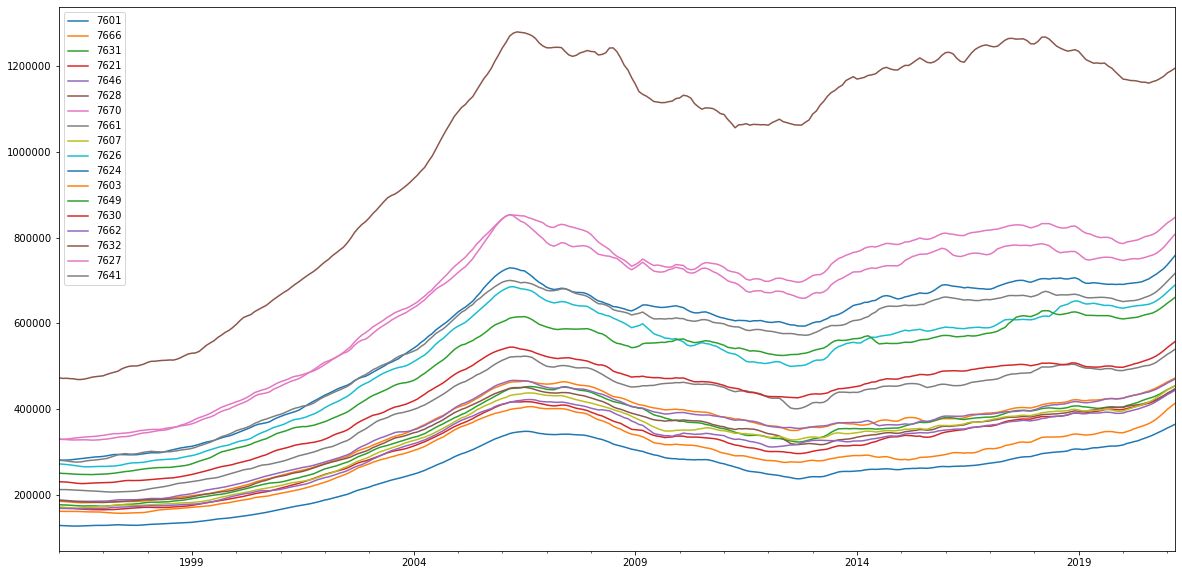

In [28]:
df.plot(figsize = [20,10])

## Account for Market Crash

In [29]:
df['mean'] = df.mean(axis=1)

In [30]:
df_crash = df[(df.index > '2007-12-01')]

In [31]:
df_crash[df_crash['mean'] == df_crash['mean'].min()]

7601      7666      7631      7621      7646      7628  \
2012-09-01  237429.0  350673.0  323396.0  296350.0  355155.0  317337.0   

                7670      7661      7607      7626      7624      7603  \
2012-09-01  696166.0  401037.0  328995.0  500805.0  594185.0  276281.0   

                7649      7630      7662       7632      7627      7641  \
2012-09-01  527868.0  426588.0  318106.0  1062934.0  660976.0  573717.0   

                     mean  
2012-09-01  458222.111111

In [32]:
df = df[(df.index >= '2012-09-01')]

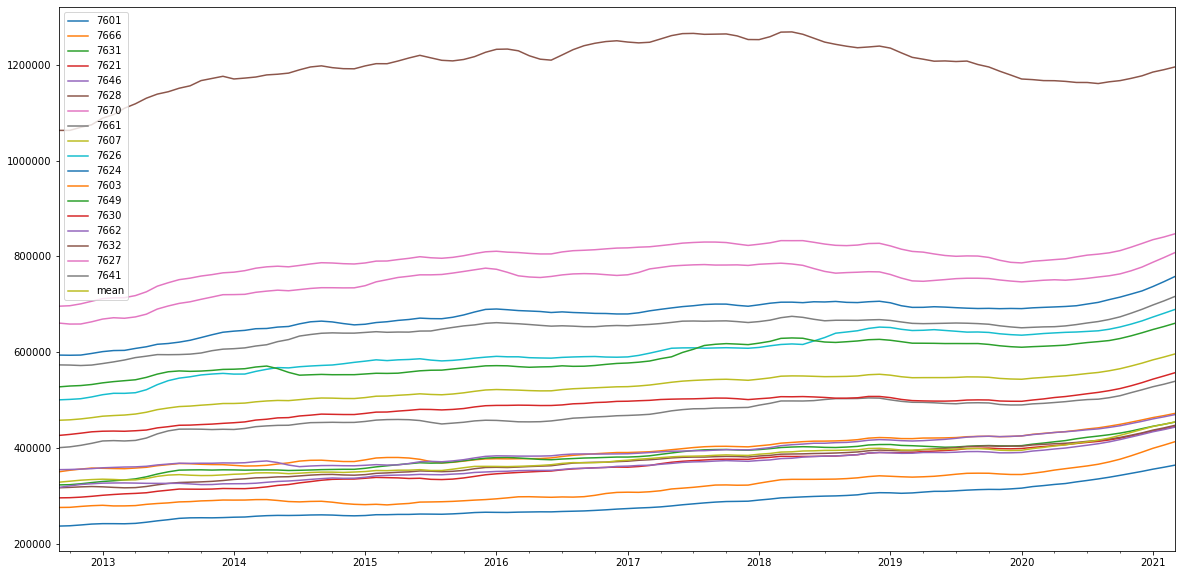

In [33]:
df.plot(figsize = [20,10])

In [34]:
new_milford_7646 = df[7646]
ts = new_milford_7646

## Stationary Check Function

In [35]:
def stationarity_check(TS):
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=12, center=False).mean()
    roll_std = TS.rolling(window=12, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS.dropna())
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(10,5))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling 12mo Mean')
    plt.plot(roll_std, color='black', label = 'Rolling 12mo Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    fig.tight_layout()
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

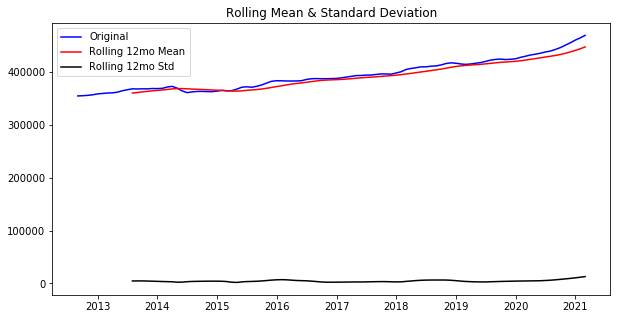

Results of Dickey-Fuller Test: 

Test Statistic                  2.221301
p-value                         0.998900
#Lags Used                     13.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [36]:
stationarity_check(ts)

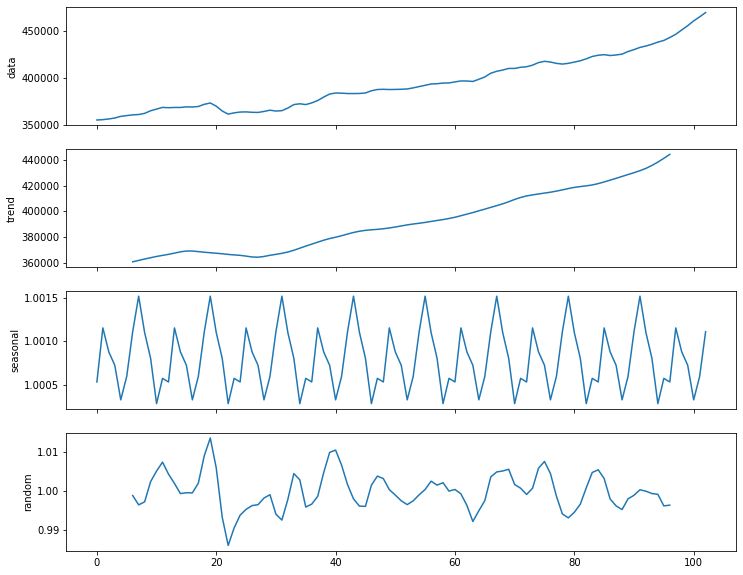

In [37]:
# Print decomposition
decomposed = decompose(ts.values, 'multiplicative', m=12)
decomposed_plot(decomposed, figure_kwargs={'figsize': (12, 10)})
plt.show()

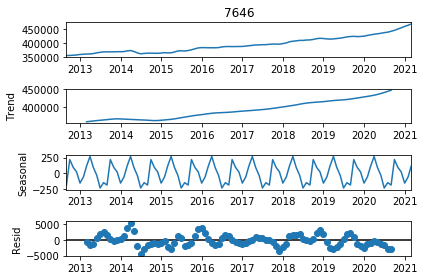

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose #for comparison
decomposition = seasonal_decompose(ts)
decomposition.plot();

## Stationary Checks

### Difference

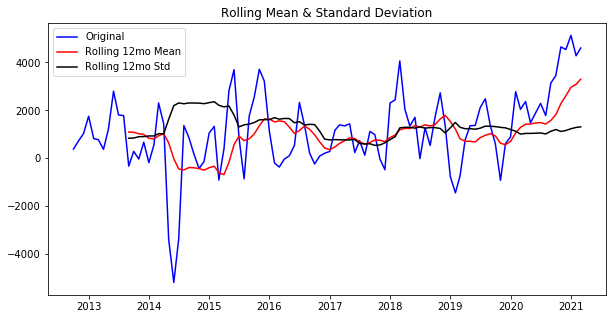

Results of Dickey-Fuller Test: 

Test Statistic                 -1.084616
p-value                         0.721168
#Lags Used                     13.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


In [39]:
# Now let's check the difference
ts_diff = ts.diff()
stationarity_check(ts_diff)

### Log Transform

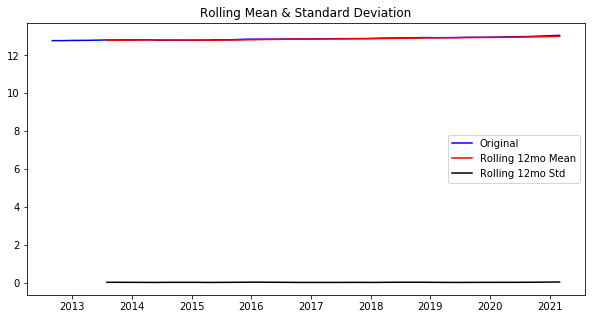

Results of Dickey-Fuller Test: 

Test Statistic                  2.837419
p-value                         1.000000
#Lags Used                     11.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [40]:
# log transform
ts_log = np.log1p(ts)
stationarity_check(ts_log)

### Square Root

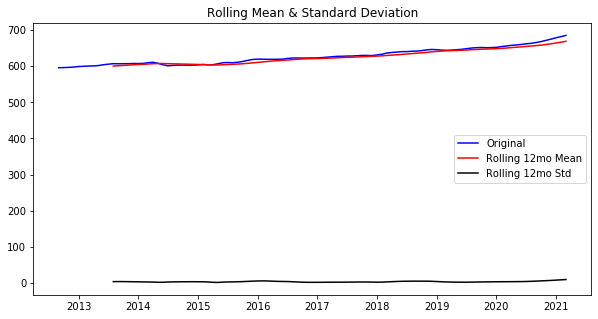

Results of Dickey-Fuller Test: 

Test Statistic                  2.198399
p-value                         0.998881
#Lags Used                     13.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [41]:
# square root transform
ts_sqrt = np.sqrt(ts)
stationarity_check(ts_sqrt)

### Log of Square Root

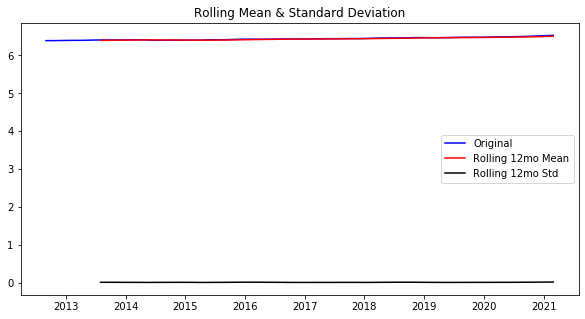

Results of Dickey-Fuller Test: 

Test Statistic                  2.837561
p-value                         1.000000
#Lags Used                     11.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [42]:
# square root transform
ts_sqrt_log = np.log1p(ts_sqrt)
stationarity_check(ts_sqrt_log)

### Log minus Rolling Mean

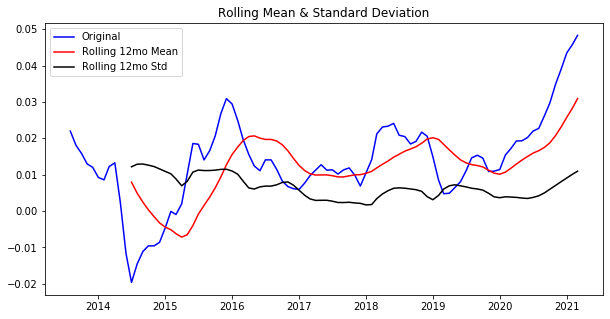

Results of Dickey-Fuller Test: 

Test Statistic                 -0.720784
p-value                         0.841292
#Lags Used                     11.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64


In [43]:
# Subtracting the rolling mean from the log
ts_roll_mean = ts_log.rolling(window=12).mean()
ts_log_minus_roll_mean = ts_log - ts_roll_mean
stationarity_check(ts_log_minus_roll_mean)

### Weighted MA of Log

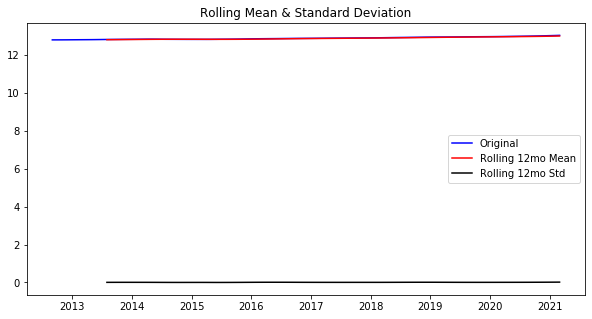

Results of Dickey-Fuller Test: 

Test Statistic                  2.694807
p-value                         0.999087
#Lags Used                     12.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [44]:
# Weighted Moving Average of log transformed data
exp_roll_mean = np.log(ts).ewm(halflife=4).mean()
stationarity_check(exp_roll_mean)

### Log minus Weighted MA of Log

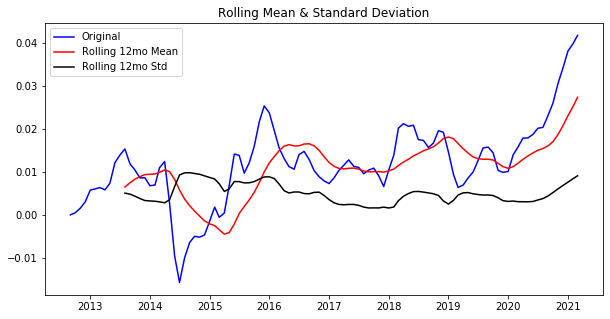

Results of Dickey-Fuller Test: 

Test Statistic                 -0.751187
p-value                         0.833042
#Lags Used                     13.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [45]:
# Subtract the exponential weighted rolling mean from the logged data
log_minus_exp_roll_mean = ts_log - exp_roll_mean
stationarity_check(log_minus_exp_roll_mean)

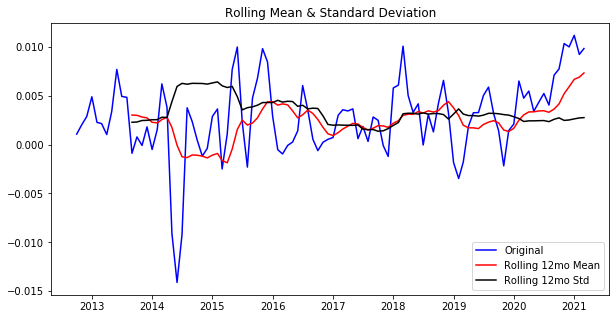

Results of Dickey-Fuller Test: 

Test Statistic                 -1.665975
p-value                         0.448723
#Lags Used                     13.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


In [46]:
# first difference of log
log_diff = ts_log.diff()
stationarity_check(log_diff)

## Correlation Plots

### ACF

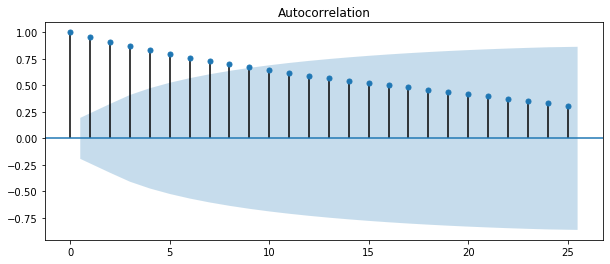

In [47]:
# Plot the ACF
fig, ax = plt.subplots(figsize=(10,4))
plot_acf(ts, ax=ax, lags=25);

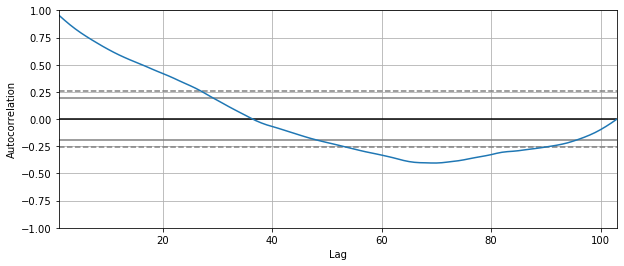

In [48]:
plt.figure(figsize=(10, 4))
pd.plotting.autocorrelation_plot(ts)

### PCF

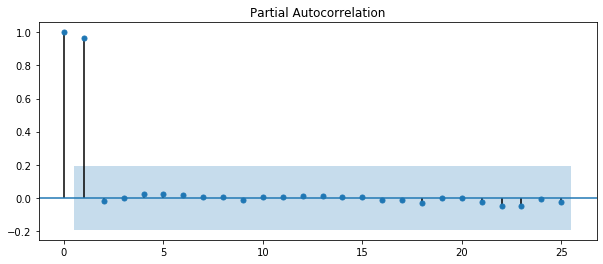

In [49]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(10,4))
plot_pacf(ts, ax=ax, lags=25);

# ARIMA Modeling

## Import Custom Metrics & Function

In [50]:
from sjs_utilities import arima_eval

## Train-Test Splits

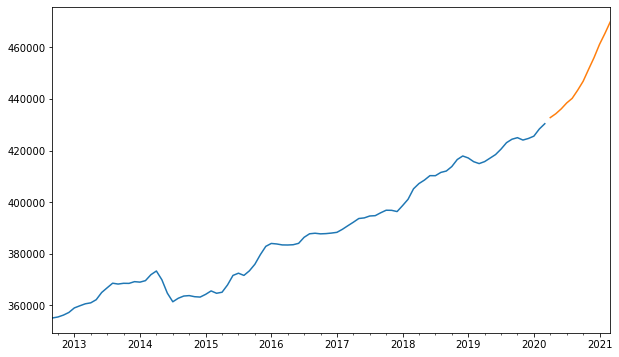

In [51]:
train_12mo, test_12mo = model_selection.train_test_split(ts, test_size=12)
plt.figure(figsize=(10,6))
train_12mo.plot()
test_12mo.plot()

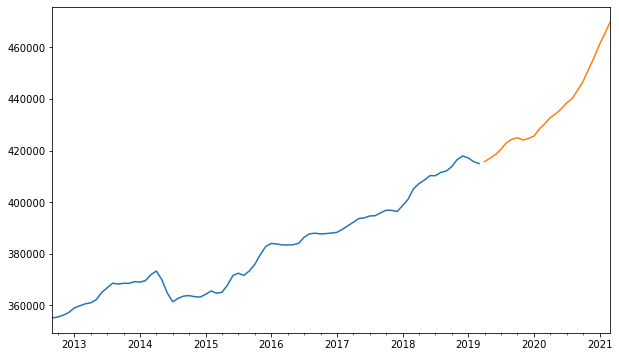

In [52]:
train_24mo, test_24mo = model_selection.train_test_split(ts, test_size=24)
plt.figure(figsize=(10,6))
train_24mo.plot()
test_24mo.plot()

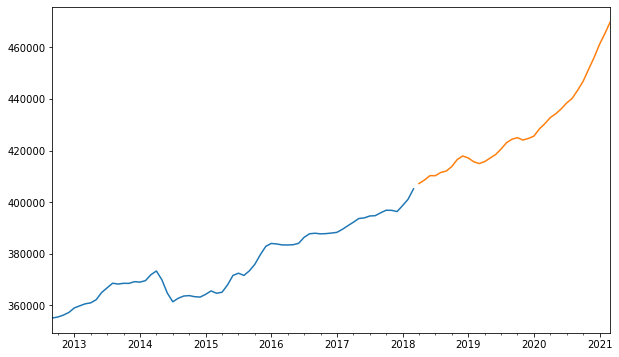

In [53]:
train_36mo, test_36mo = model_selection.train_test_split(ts, test_size=36)
plt.figure(figsize=(10,6))
train_36mo.plot()
test_36mo.plot()

## First Run of Auto ARIMA

### 12 Month Test Set

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1592.002, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1567.725, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1589.478, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1571.911, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1592.041, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1568.627, Time=0.12 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1568.618, Time=0.12 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1570.609, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1588.136, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1583.542, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1571.725, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 2.570 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -781.862
Date:                Thu, 27 May 2021   AIC                           1567.725
Time:                        00:28:15   BIC                           1572.724
Sample:                             0   HQIC                          1569.741
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    835.7778    166.945      5.006      0.000     508.572    1162.983
sigma2      2.057e+06   2.08e+05      9.897      0.000    1.65e+06    2.46e+06
===================================================================================
Ljung-Box (Q):                      134.70   Jarque-Bera (JB):                55.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.98
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

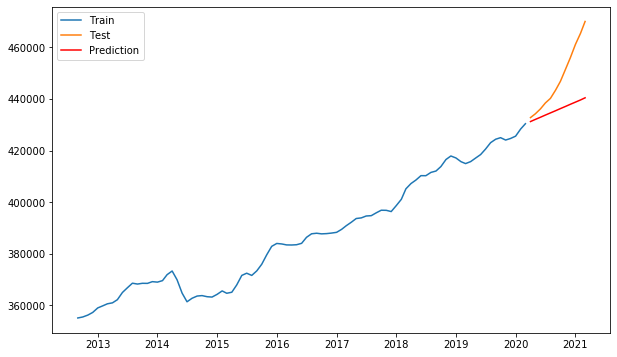

Model Explained Variance      r^2         MAE        RMSE ARIMA Order  \
0  12mo             41.06%  -59.07%  $12,155.19  $15,320.44   (0, 1, 0)   

  Seasonal Order      AIC  
0  (0, 0, 0, 12)  1567.72

In [54]:
arima = pm.auto_arima(train_12mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)
arima_eval('12mo', ts, train_12mo, test_12mo, arima);

### 24 Month Test Set

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1386.138, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1364.272, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1382.431, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1379.942, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1380.776, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1365.392, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1365.386, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1367.377, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1380.957, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1378.840, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1368.261, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 2.117 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   79
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -680.136
Date:                Thu, 27 May 2021   AIC                           1364.272
Time:                        00:28:18   BIC                           1368.985
Sample:                             0   HQIC                          1366.159
                                 - 79                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    766.3846    183.803      4.170      0.000     406.137    1126.632
sigma2      2.195e+06   2.41e+05      9.112      0.000    1.72e+06    2.67e+06
===================================================================================
Ljung-Box (Q):                      126.21   Jarque-Bera (JB):                42.59
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.92
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

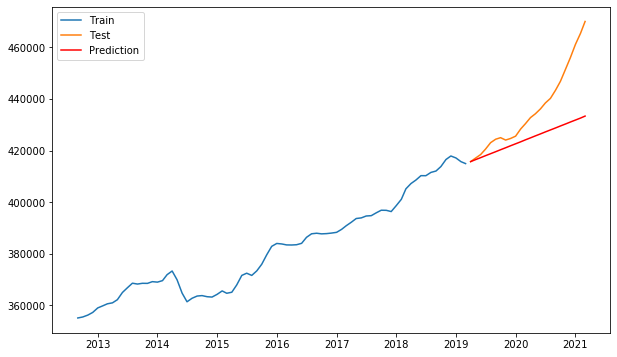

Model Explained Variance      r^2         MAE        RMSE ARIMA Order  \
1  24mo             54.17%    3.08%  $11,013.03  $15,168.44   (0, 1, 0)   
0  12mo             41.06%  -59.07%  $12,155.19  $15,320.44   (0, 1, 0)   

  Seasonal Order      AIC  
1  (0, 0, 0, 12)  1364.27  
0  (0, 0, 0, 12)  1567.72

In [55]:
arima = pm.auto_arima(train_24mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)
arima_eval('24mo', ts, train_24mo, test_24mo, arima);

### 36 Month Test Set

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1179.528, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1158.520, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1172.816, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1173.157, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1171.151, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1159.762, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1159.757, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1161.753, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1171.307, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1171.916, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1172.496, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 0.900 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   67
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -577.260
Date:                Thu, 27 May 2021   AIC                           1158.520
Time:                        00:28:19   BIC                           1162.900
Sample:                             0   HQIC                          1160.251
                                 - 67                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    757.7121    206.163      3.675      0.000     353.640    1161.784
sigma2      2.315e+06   2.72e+05      8.509      0.000    1.78e+06    2.85e+06
===================================================================================
Ljung-Box (Q):                       99.78   Jarque-Bera (JB):                40.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                            -0.96
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

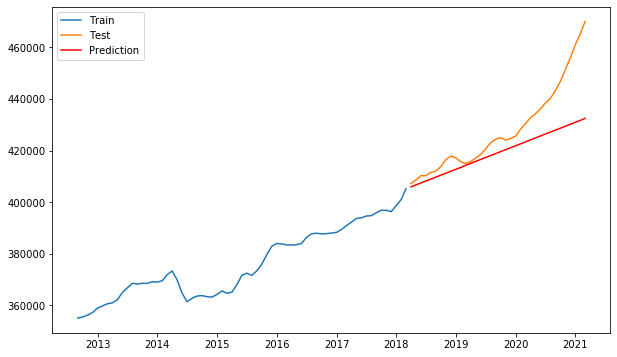

Model Explained Variance      r^2         MAE        RMSE ARIMA Order  \
2  36mo             66.66%   38.33%   $8,827.77  $13,023.85   (0, 1, 0)   
1  24mo             54.17%    3.08%  $11,013.03  $15,168.44   (0, 1, 0)   
0  12mo             41.06%  -59.07%  $12,155.19  $15,320.44   (0, 1, 0)   

  Seasonal Order      AIC  
2  (0, 0, 0, 12)  1158.52  
1  (0, 0, 0, 12)  1364.27  
0  (0, 0, 0, 12)  1567.72

In [56]:
arima = pm.auto_arima(train_36mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)
arima_eval('36mo', ts, train_36mo, test_36mo, arima);

## 2nd Difference

In [57]:
# Stationary Check
adf_test = ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(ts)
print(f"P-Value: {p_val:.4f}, so should you difference the data? {should_diff}")

P-Value: 0.9900, so should you difference the data? True


In [58]:
# Estimate the number of differences using an ADF test:
from pmdarima.arima.utils import ndiffs
n_adf = ndiffs(ts, test='adf')
n_adf

2

In [59]:
ts_diff_2 = ts.diff(periods=2).dropna()

In [60]:
train_2diff_12mo, test_2diff_12mo = model_selection.train_test_split(ts_diff_2, test_size=12)
train_2diff_24mo, test_2diff_24mo = model_selection.train_test_split(ts_diff_2, test_size=24)
train_2diff_36mo, test_2diff_36mo = model_selection.train_test_split(ts_diff_2, test_size=36)

### 12 Month Test Set

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1651.617, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1575.579, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1681.508, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1599.260, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1560.179, Time=0.43 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1623.132, Time=0.55 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1518.179, Time=1.01 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1524.908, Time=0.74 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=1500.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   89
Model:             SARIMAX(4, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -741.887
Date:                            Thu, 27 May 2021   AIC                           1499.773
Time:                                    00:28:38   BIC                           1519.682
Sample:                                         0   HQIC                          1507.798
                                             - 89                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    571.3004    253.145      2.257      0.024      75.146    1067.455
ar.L1          1.6032      0.107     15.005      0.000       1.394       1.813
ar.L2         -1.4021      0.200     -7.002      0.000      -1.795      -1.010
ar.L3          0.7391      0.209      3.529      0.000       0.329       1.149
ar.L4         -0.1310      0.132     -0.990      0.322      -0.390       0.128
ar.S.L12      -0.5820      0.147     -3.971      0.000      -0.869      -0.295
ar.S.L24      -0.4049      0.118     -3.420      0.001      -0.637      -0.173
sigma2      9.088e+05   1.41e+05      6.447      0.000    6.33e+05    1.19e+06
===================================================================================
Ljung-Box (Q):                       58.91   Jarque-Bera (JB):                24.61
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.63
Prob(H) (two-sided):                  0.32   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

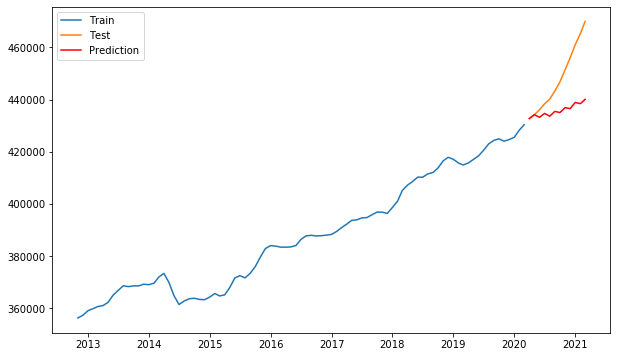

Model Explained Variance      r^2         MAE        RMSE  \
3  2nd Diff 12mo             32.63%  -67.12%  $12,131.61  $15,703.24   
2           36mo             66.66%   38.33%   $8,827.77  $13,023.85   
1           24mo             54.17%    3.08%  $11,013.03  $15,168.44   
0           12mo             41.06%  -59.07%  $12,155.19  $15,320.44   

  ARIMA Order Seasonal Order      AIC  
3   (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2   (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1   (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0   (0, 1, 0)  (0, 0, 0, 12)  1567.72

In [64]:
arima = pm.auto_arima(train_2diff_12mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)
arima_eval('2nd Diff 12mo', ts, train_2diff_12mo, test_2diff_12mo, arima, periods=2);

### 24 Month Test Set

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1434.534, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1371.959, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1455.857, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1389.408, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1355.647, Time=0.33 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1408.036, Time=0.43 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1321.067, Time=0.88 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1329.540, Time=0.25 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=1304.2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   77
Model:             SARIMAX(2, 0, 1)x(2, 0, [], 12)   Log Likelihood                -642.402
Date:                             Thu, 27 May 2021   AIC                           1298.803
Time:                                     00:29:13   BIC                           1315.210
Sample:                                          0   HQIC                          1305.366
                                              - 77                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1783.8781    400.252      4.457      0.000     999.399    2568.357
ar.L1          0.7749      0.099      7.863      0.000       0.582       0.968
ar.L2         -0.3467      0.097     -3.562      0.000      -0.537      -0.156
ma.L1          0.8675      0.091      9.510      0.000       0.689       1.046
ar.S.L12      -0.6105      0.165     -3.692      0.000      -0.935      -0.286
ar.S.L24      -0.4334      0.120     -3.603      0.000      -0.669      -0.198
sigma2      8.953e+05   1.48e+05      6.037      0.000    6.05e+05    1.19e+06
===================================================================================
Ljung-Box (Q):                       48.36   Jarque-Bera (JB):                 5.23
Prob(Q):                              0.17   Prob(JB):                         0.07
Heteroskedasticity (H):               0.67   Skew:                            -0.35
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

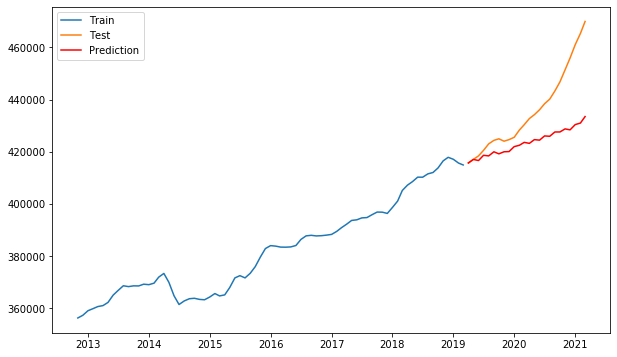

Model Explained Variance      r^2         MAE        RMSE  \
4  2nd Diff 24mo             51.12%   -9.21%  $11,966.97  $16,101.27   
3  2nd Diff 12mo             32.63%  -67.12%  $12,131.61  $15,703.24   
2           36mo             66.66%   38.33%   $8,827.77  $13,023.85   
1           24mo             54.17%    3.08%  $11,013.03  $15,168.44   
0           12mo             41.06%  -59.07%  $12,155.19  $15,320.44   

  ARIMA Order Seasonal Order      AIC  
4   (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3   (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2   (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1   (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0   (0, 1, 0)  (0, 0, 0, 12)  1567.72

In [65]:
arima = pm.auto_arima(train_2diff_24mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)
arima_eval('2nd Diff 24mo', ts, train_2diff_24mo, test_2diff_24mo, arima, periods=2);

### 36 Month Test Set

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1213.166, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1165.560, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1228.611, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1177.947, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1153.519, Time=0.28 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1206.385, Time=0.07 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1122.479, Time=0.51 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1128.393, Time=0.16 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=1109.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   65
Model:             SARIMAX(2, 0, 1)x(2, 0, [], 12)   Log Likelihood                -544.095
Date:                             Thu, 27 May 2021   AIC                           1102.190
Time:                                     00:29:40   BIC                           1117.411
Sample:                                          0   HQIC                          1108.195
                                              - 65                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1652.8520    411.696      4.015      0.000     845.943    2459.761
ar.L1          0.8537      0.110      7.730      0.000       0.637       1.070
ar.L2         -0.4385      0.114     -3.847      0.000      -0.662      -0.215
ma.L1          0.8269      0.133      6.239      0.000       0.567       1.087
ar.S.L12      -0.5695      0.195     -2.916      0.004      -0.952      -0.187
ar.S.L24      -0.3693      0.150     -2.465      0.014      -0.663      -0.076
sigma2       9.46e+05   1.66e+05      5.686      0.000     6.2e+05    1.27e+06
===================================================================================
Ljung-Box (Q):                       51.37   Jarque-Bera (JB):                 6.49
Prob(Q):                              0.11   Prob(JB):                         0.04
Heteroskedasticity (H):               0.57   Skew:                            -0.42
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

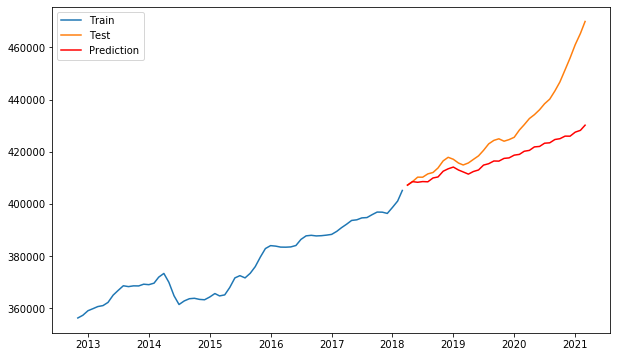

Model Explained Variance      r^2         MAE        RMSE  \
5  2nd Diff 36mo             60.01%   17.39%  $10,825.84  $15,072.79   
4  2nd Diff 24mo             51.12%   -9.21%  $11,966.97  $16,101.27   
3  2nd Diff 12mo             32.63%  -67.12%  $12,131.61  $15,703.24   
2           36mo             66.66%   38.33%   $8,827.77  $13,023.85   
1           24mo             54.17%    3.08%  $11,013.03  $15,168.44   
0           12mo             41.06%  -59.07%  $12,155.19  $15,320.44   

  ARIMA Order Seasonal Order      AIC  
5   (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4   (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3   (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2   (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1   (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0   (0, 1, 0)  (0, 0, 0, 12)  1567.72

In [66]:
arima = pm.auto_arima(train_2diff_36mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)
arima_eval('2nd Diff 36mo', ts, train_2diff_36mo, test_2diff_36mo, arima, periods=2);

## 1st Difference

In [67]:
train_1diff_12mo, test_1diff_12mo = model_selection.train_test_split(ts_diff.dropna(), test_size=12)
train_1diff_24mo, test_1diff_24mo = model_selection.train_test_split(ts_diff.dropna(), test_size=24)
train_1diff_36mo, test_1diff_36mo = model_selection.train_test_split(ts_diff.dropna(), test_size=36)

### 12 Month Test Set

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1567.725, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1520.564, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1592.035, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1537.715, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1509.091, Time=0.52 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1539.668, Time=0.40 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1508.149, Time=0.38 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1513.133, Time=0.18 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=1509.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   90
Model:             SARIMAX(2, 0, 2)x(2, 0, [], 12)   Log Likelihood                -738.606
Date:                             Thu, 27 May 2021   AIC                           1493.213
Time:                                     00:30:00   BIC                           1513.211
Sample:                                          0   HQIC                          1501.277
                                              - 90                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2355.5526    468.726      5.025      0.000    1436.866    3274.239
ar.L1         -0.1805      0.118     -1.524      0.127      -0.413       0.052
ar.L2         -0.2651      0.102     -2.590      0.010      -0.466      -0.064
ma.L1          0.9312      0.073     12.729      0.000       0.788       1.075
ma.L2          0.9215      0.098      9.392      0.000       0.729       1.114
ar.S.L12      -0.5764      0.132     -4.365      0.000      -0.835      -0.318
ar.S.L24      -0.4087      0.115     -3.565      0.000      -0.633      -0.184
sigma2      6.928e+05   9.47e+04      7.313      0.000    5.07e+05    8.78e+05
===================================================================================
Ljung-Box (Q):                       29.29   Jarque-Bera (JB):                39.31
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.57
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

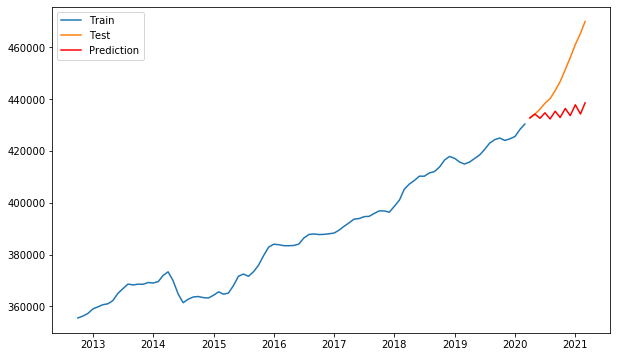

Model Explained Variance       r^2         MAE        RMSE  \
6  1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5  2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4  2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3  2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2           36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1           24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0           12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

  ARIMA Order Seasonal Order      AIC  
6   (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5   (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4   (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3   (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2   (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1   (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0   (0, 1, 0)  (0, 0, 0, 12)  1567.72

In [68]:
arima = pm.auto_arima(train_1diff_12mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)
arima_eval('1st Diff 12mo', ts, train_1diff_12mo, test_1diff_12mo, arima, periods=2);

### 24 Month Test Set

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1364.272, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1324.988, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.770, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1338.187, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1314.329, Time=0.49 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1338.297, Time=0.38 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1311.381, Time=0.60 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1317.039, Time=0.18 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=1312.4

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   78
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -649.690
Date:                            Thu, 27 May 2021   AIC                           1311.381
Time:                                    00:30:08   BIC                           1325.521
Sample:                                         0   HQIC                          1317.041
                                             - 78                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    872.8279    198.527      4.397      0.000     483.721    1261.934
ar.L1          0.6788      0.091      7.483      0.000       0.501       0.857
ar.L2         -0.2679      0.086     -3.107      0.002      -0.437      -0.099
ar.S.L12      -0.5320      0.149     -3.577      0.000      -0.824      -0.241
ar.S.L24      -0.4012      0.125     -3.211      0.001      -0.646      -0.156
sigma2      9.242e+05   1.34e+05      6.921      0.000    6.62e+05    1.19e+06
===================================================================================
Ljung-Box (Q):                       53.17   Jarque-Bera (JB):                13.49
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.22   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

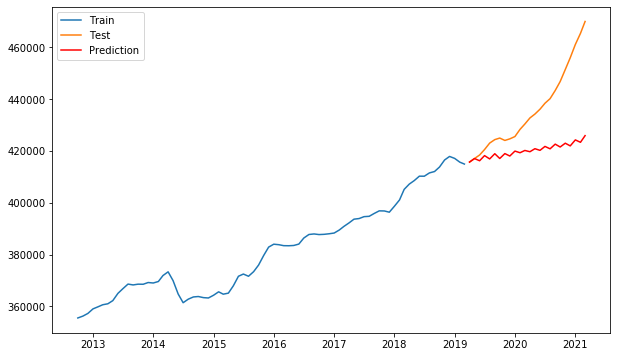

Model Explained Variance       r^2         MAE        RMSE  \
7  1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6  1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5  2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4  2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3  2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2           36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1           24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0           12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

  ARIMA Order Seasonal Order      AIC  
7   (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6   (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5   (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4   (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3   (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2   (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1   (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0   (0, 1, 0)  (0, 0, 0, 12)  1567.72

In [69]:
arima = pm.auto_arima(train_1diff_24mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)
arima_eval('1st Diff 24mo', ts, train_1diff_24mo, test_1diff_24mo, arima, periods=2);

### 36 Month Test Set

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1158.520, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1128.092, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1171.143, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1137.020, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1120.813, Time=0.43 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1141.396, Time=0.28 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1118.849, Time=0.29 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1120.057, Time=0.14 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=1118.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   66
Model:             SARIMAX(4, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -550.279
Date:                            Thu, 27 May 2021   AIC                           1116.557
Time:                                    00:30:20   BIC                           1134.074
Sample:                                         0   HQIC                          1123.479
                                             - 66                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    389.4416    278.573      1.398      0.162    -156.551     935.434
ar.L1          0.7668      0.160      4.797      0.000       0.454       1.080
ar.L2         -0.1365      0.212     -0.643      0.520      -0.553       0.280
ar.L3         -0.2963      0.194     -1.526      0.127      -0.677       0.084
ar.L4          0.3555      0.170      2.092      0.036       0.022       0.689
ar.S.L12      -0.5112      0.215     -2.382      0.017      -0.932      -0.091
ar.S.L24      -0.3640      0.161     -2.266      0.023      -0.679      -0.049
sigma2      9.152e+05    1.6e+05      5.722      0.000    6.02e+05    1.23e+06
===================================================================================
Ljung-Box (Q):                       42.40   Jarque-Bera (JB):                19.14
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.64
Prob(H) (two-sided):                  0.30   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

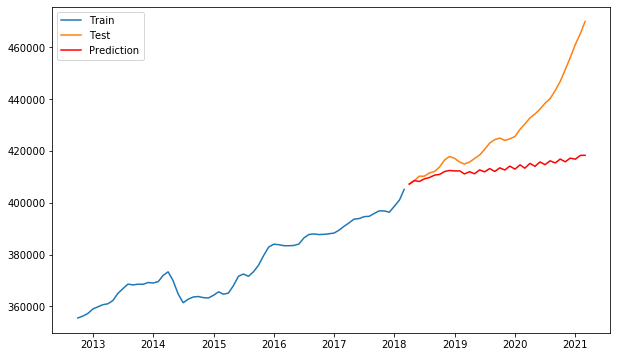

Model Explained Variance       r^2         MAE        RMSE  \
8  1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7  1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6  1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5  2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4  2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3  2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2           36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1           24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0           12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

  ARIMA Order Seasonal Order      AIC  
8   (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7   (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6   (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5   (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4   (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3   (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2   (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1   (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0   (0, 1, 0)  (0, 0, 0, 12)  1567.72

In [70]:
arima = pm.auto_arima(train_1diff_36mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)
arima_eval('1st Diff 36mo', ts, train_1diff_36mo, test_1diff_36mo, arima, periods=2);

## Logged

In [71]:
train_log_12mo, test_log_12mo = model_selection.train_test_split(ts_log, test_size=12)
train_log_24mo, test_log_24mo = model_selection.train_test_split(ts_log, test_size=24)
train_log_36mo, test_log_36mo = model_selection.train_test_split(ts_log, test_size=36)

### 12 Month Test Set

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-802.488, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-745.708, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-793.107, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-722.539, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-824.125, Time=0.88 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-792.854, Time=0.35 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-811.142, Time=1.43 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-805.585, Time=0.58 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-814.481, Time=1.53 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-827.810, Time=0.60 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-788.368, Time=0.07 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-823.089, Time=0.72 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=-820.112, Time=0.82 sec
 ARIMA(1,1,2)(1,0,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   91
Model:             SARIMAX(0, 1, 3)x(0, 0, [1], 12)   Log Likelihood                 419.960
Date:                              Thu, 27 May 2021   AIC                           -827.919
Time:                                      00:30:46   BIC                           -812.920
Sample:                                           0   HQIC                          -821.871
                                               - 91                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0021      0.000      8.511      0.000       0.002       0.003
ma.L1          0.8109      0.099      8.182      0.000       0.617       1.005
ma.L2          0.6348      0.117      5.405      0.000       0.405       0.865
ma.L3         -0.0028      0.111     -0.025      0.980      -0.221       0.216
ma.S.L12      -0.8694      0.384     -2.263      0.024      -1.622      -0.116
sigma2      4.261e-06   1.56e-06      2.739      0.006    1.21e-06    7.31e-06
===================================================================================
Ljung-Box (Q):                       30.93   Jarque-Bera (JB):                83.69
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.94
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

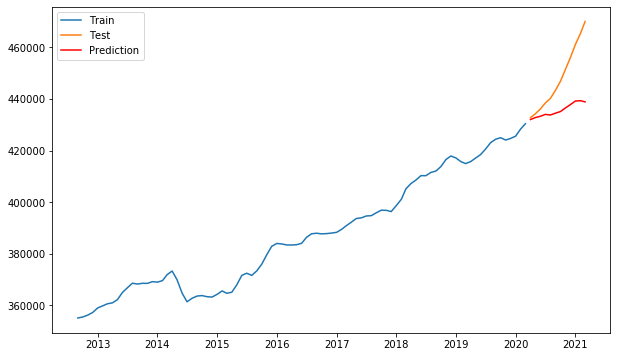

Model Explained Variance       r^2         MAE        RMSE  \
9    Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8  1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7  1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6  1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5  2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4  2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3  2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2           36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1           24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0           12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

  ARIMA Order Seasonal Order      AIC  
9   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8   (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7   (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6   (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5   (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4   (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3   (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2   (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1   (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0   (0, 1, 0)  (0, 0, 0, 12)  1567.72

In [72]:
arima = pm.auto_arima(train_log_12mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)
y_pred_log_12mo = arima_eval('Logged 12mo', ts, train_log_12mo, test_log_12mo, arima, log=True);

### 24 Month Test Set

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-802.488, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-745.708, Time=0.18 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-793.107, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-722.539, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-824.125, Time=0.46 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-792.854, Time=0.30 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-811.142, Time=1.01 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-805.585, Time=0.58 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-814.481, Time=1.58 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-827.810, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-788.368, Time=0.07 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-823.089, Time=0.76 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=-820.112, Time=0.83 sec
 ARIMA(1,1,2)(1,0,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   91
Model:             SARIMAX(0, 1, 3)x(0, 0, [1], 12)   Log Likelihood                 419.960
Date:                              Thu, 27 May 2021   AIC                           -827.919
Time:                                      00:31:06   BIC                           -812.920
Sample:                                           0   HQIC                          -821.871
                                               - 91                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0021      0.000      8.511      0.000       0.002       0.003
ma.L1          0.8109      0.099      8.182      0.000       0.617       1.005
ma.L2          0.6348      0.117      5.405      0.000       0.405       0.865
ma.L3         -0.0028      0.111     -0.025      0.980      -0.221       0.216
ma.S.L12      -0.8694      0.384     -2.263      0.024      -1.622      -0.116
sigma2      4.261e-06   1.56e-06      2.739      0.006    1.21e-06    7.31e-06
===================================================================================
Ljung-Box (Q):                       30.93   Jarque-Bera (JB):                83.69
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.94
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

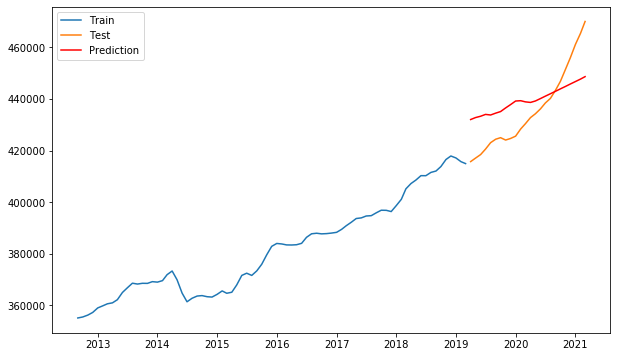

Model Explained Variance       r^2         MAE        RMSE  \
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

In [73]:
arima = pm.auto_arima(train_log_12mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)
y_pred_log_12mo = arima_eval('Logged 24mo', ts, train_log_24mo, test_log_24mo, arima, log=True);

### 36 Month Test Set

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-802.488, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-745.708, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-793.107, Time=1.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-722.539, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-824.125, Time=0.47 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-792.854, Time=0.47 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-811.142, Time=1.11 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-805.585, Time=0.58 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-814.481, Time=1.77 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-827.810, Time=1.01 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-788.368, Time=0.07 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-823.089, Time=0.91 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=-820.112, Time=0.99 sec
 ARIMA(1,1,2)(1,0,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   91
Model:             SARIMAX(0, 1, 3)x(0, 0, [1], 12)   Log Likelihood                 419.960
Date:                              Thu, 27 May 2021   AIC                           -827.919
Time:                                      00:31:30   BIC                           -812.920
Sample:                                           0   HQIC                          -821.871
                                               - 91                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0021      0.000      8.511      0.000       0.002       0.003
ma.L1          0.8109      0.099      8.182      0.000       0.617       1.005
ma.L2          0.6348      0.117      5.405      0.000       0.405       0.865
ma.L3         -0.0028      0.111     -0.025      0.980      -0.221       0.216
ma.S.L12      -0.8694      0.384     -2.263      0.024      -1.622      -0.116
sigma2      4.261e-06   1.56e-06      2.739      0.006    1.21e-06    7.31e-06
===================================================================================
Ljung-Box (Q):                       30.93   Jarque-Bera (JB):                83.69
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.94
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

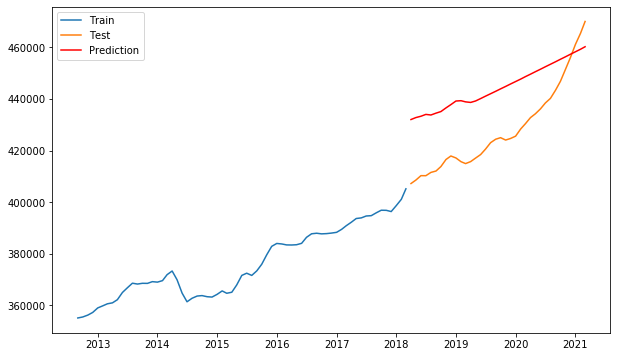

Model Explained Variance       r^2         MAE        RMSE  \
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

In [74]:
arima = pm.auto_arima(train_log_12mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=True, m=12)
y_pred_log_12mo = arima_eval('Logged 36mo', ts, train_log_36mo, test_log_36mo, arima, log=True);

## Stats Models

In [130]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = (1,3,3,12)

#determine what the best model would be using a for loop
ans = []
for comb in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(train_12mo,
                                        order=comb,
                                        seasonal_order=(1,3,3,12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        output = mod.fit()
        ans.append([comb, pdqs, output.aic])
        print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
    except:
        continue
            
#print out the best model parameters
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df[ans_df['aic'] == ans_df['aic'].min()]

pdq           pdqs         aic
3  (0, 1, 1)  (1, 3, 3, 12)  325.216541

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   7646   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -786.661
Date:                Thu, 27 May 2021   AIC                           1575.321
Time:                        00:26:12   BIC                           1577.810
Sample:                    09-01-2012   HQIC                          1576.324
                         - 03-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.742e+06   3.69e+05      7.440      0.000    2.02e+06    3.46e+06
===================================================================================
Ljung-Box (Q):                      134.09   Jarque-Bera (JB):                53.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.98
Prob(H) (two-sided):                  1.00   Kurtosis:                         6.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

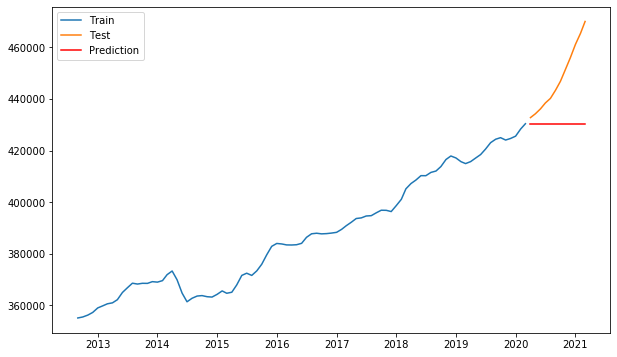

Model Explained Variance         r^2          MAE         RMSE  \
5  Stats 12mo              0.00%    -209.63%   $17,587.75   $21,374.90   
4  Stats 12mo              9.89%    -126.05%   $14,162.97   $18,263.58   
3  Stats 12mo              0.00%    -209.63%   $17,587.75   $21,374.90   
2  Stats 12mo              0.00%    -204.96%   $17,390.59   $21,212.96   
1  Stats 12mo         -27152.13%  -66747.73%  $242,085.06  $314,067.96   
0        12mo             41.06%     -59.07%   $12,155.19   $15,320.44   

  ARIMA Order Seasonal Order      AIC  
5   (0, 1, 0)  (0, 0, 0, 12)  1575.32  
4   (1, 1, 0)  (0, 0, 0, 12)  1525.90  
3   (0, 1, 0)  (0, 0, 0, 12)  1575.32  
2   (0, 1, 1)  (0, 0, 0, 12)  1513.92  
1   (0, 1, 1)  (1, 3, 3, 12)   325.22  
0   (0, 1, 0)  (0, 0, 0, 12)  1567.72

In [62]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
mod = sm.tsa.statespace.SARIMAX(train_12mo, order=(0,1,0),
                                seasonal_order=(0,0,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
arima_eval('Stats 12mo', ts, train_12mo, test_12mo, mod, library='statsmodels');

In [203]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

def find_pdq(ts, param_pool=2):
    
    '''returns p,d,q parameters with highest aic for ARIMA model'''
   
    p=d=q=range(0,param_pool)
    pdq = list(itertools.product(p,d,q))
    aics = []
    for param in pdq:
        try:
            model_arima = sm.tsa.statespace.SARIMAX(train_12mo,order=param)
            model_arima_fit = model_arima.fit()
            aics.append([param, model_arima_fit.aic])
        except:
            continue
    aics_df = pd.DataFrame(aics, columns=['pdq', 'aic'])
    pdq = aics_df.loc[aics_df['aic'].idxmin()]
    return pdq[0]

In [86]:
def forecast(ts, periods=1):
    
    '''Predicts values for given number of periods using ARIMA model.
       Returns: list of predicted values, time series with predicted values, 
       rate of change between last actual value and last predicted value '''
        
    predictions = []
    time_s = ts.copy()
    
    for t in range(periods):
        pdq = find_pdq(time_s)
        model = ARIMA(time_s, order=pdq, enforce_stationarity=False, 
                      enforce_invertibility=False)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        time_s.loc[time_s.index.max()+pd.DateOffset(months=1)] = yhat
    
    growth_rate = (1 - (ts.values[-1] / predictions[-1])) * 100
    return predictions, time_s['2018-04-01':], growth_rate 

In [87]:
def plot_forecast(ts, periods=1):
    
    '''Predicts values for given number of periods using ARIMA model.
       Returns: plot with actual and predicted values marked with different colors,
                rate of change between last actual value and last predicted value'''
    
    forecast_ = forecast(ts, periods=periods)
    
    print('Predicted growth rate in ', periods, 'month period = ', np.round(forecast_[2], 1), '%')
    
    plt.figure(figsize=(14,7))
    plt.plot(ts['2008-04-01':], label='prices') # plots actual data starting at year 2008 for better view
    plt.plot(forecast_[1], label='predictions', color='red') #plots predicted data in red color
    plt.axvline('2018-04-01', color='black') # show where forecast starts
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper left', fontsize=14)
    plt.show()
    
    return forecast_[2] # returns growth rate

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model

Predicted growth rate in  1 month period =  1.2 %


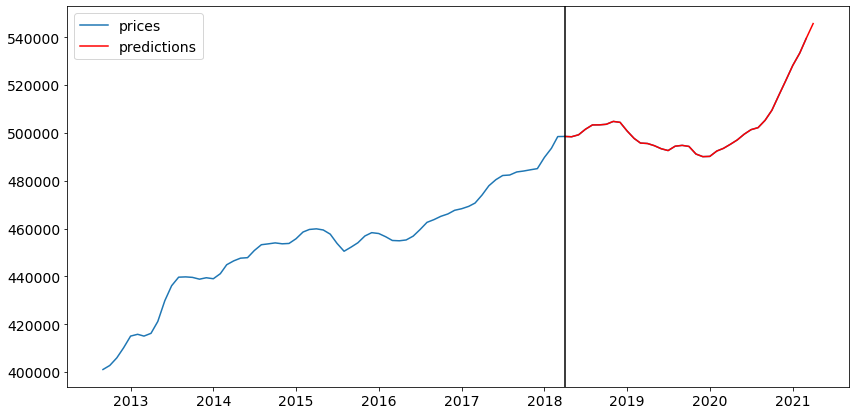

1.1545792758644424

In [89]:
plot_forecast(ts)

# Applying to All Zips

## With Seasonality

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1510.366, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1483.875, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1499.082, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1496.451, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1548.123, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1485.873, Time=0.09 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1485.873, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1487.873, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1537.644, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1494.465, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1498.226, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 1.628 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -739.938
Date:                Thu, 27 May 2021   AIC                           1483.875
Time:                        01:29:39   BIC                           1488.875
Sample:                             0   HQIC                          1485.892
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    938.7889     97.454      9.633      0.000     747.782    1129.795
sigma2      8.103e+05   1.29e+05      6.282      0.000    5.57e+05    1.06e+06
===================================================================================
Ljung-Box (Q):                       98.56   Jarque-Bera (JB):                 1.53
Prob(Q):                              0.00   Prob(JB):                         0.47
Heteroskedasticity (H):               0.91   Skew:                             0.31
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

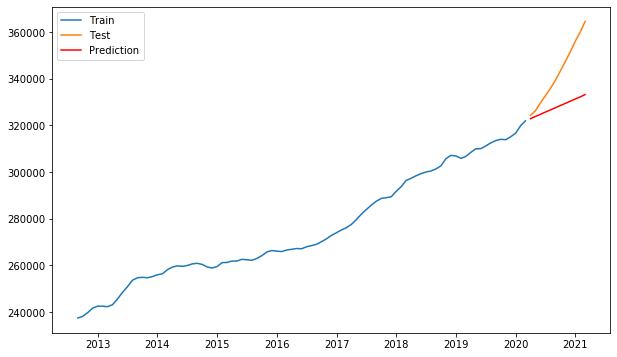

Model Explained Variance       r^2         MAE        RMSE  \
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1601.429, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1583.564, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1617.029, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1594.275, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1606.810, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1584.583, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1584.568, Time=0.09 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1586.527, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1615.512, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1593.152, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1605.308, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 1.866 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -789.782
Date:                Thu, 27 May 2021   AIC                           1583.564
Time:                        01:29:41   BIC                           1588.563
Sample:                             0   HQIC                          1585.580
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    891.1222    175.532      5.077      0.000     547.086    1235.158
sigma2      2.453e+06   3.29e+05      7.452      0.000    1.81e+06     3.1e+06
===================================================================================
Ljung-Box (Q):                      301.87   Jarque-Bera (JB):                 7.17
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               0.51   Skew:                            -0.57
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

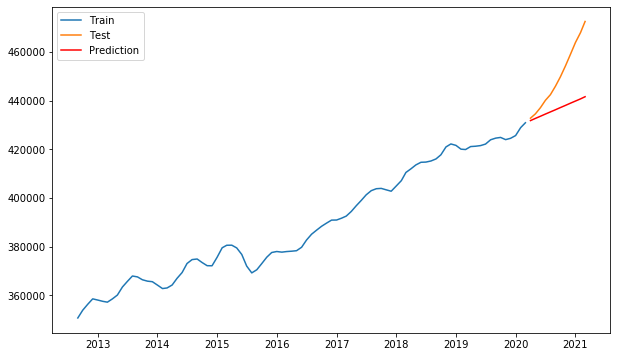

Model Explained Variance       r^2         MAE        RMSE  \
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1571.327, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1653.256, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1582.354, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1602.107, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1572.965, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1572.961, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1574.957, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1573.325, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1580.672, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1609.173, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 1.364 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -783.664
Date:                Thu, 27 May 2021   AIC                           1571.327
Time:                        01:29:43   BIC                           1576.327
Sample:                             0   HQIC                          1573.343
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    969.8667    164.833      5.884      0.000     646.800    1292.933
sigma2      2.141e+06    3.2e+05      6.701      0.000    1.51e+06    2.77e+06
===================================================================================
Ljung-Box (Q):                      176.12   Jarque-Bera (JB):                 4.54
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               0.67   Skew:                             0.53
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

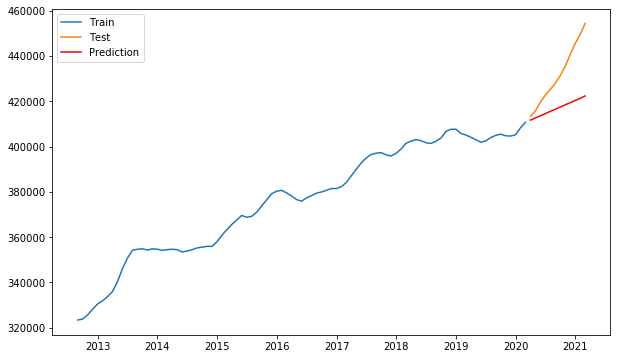

Model Explained Variance       r^2         MAE        RMSE  \
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1532.574, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1578.007, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1537.124, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1593.709, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1532.462, Time=0.11 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1532.713, Time=0.39 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1534.460, Time=0.15 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1532.463, Time=0.10 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1534.712, Time=0.33 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1537.330, Time=0.16 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1540.976, Time=0.16 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=1596.023, Time=0.02 sec

Best model:  ARIMA(0,1,0)(1,0,0)[12] intercept
Total fit time: 2.908 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   91
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -763.231
Date:                            Thu, 27 May 2021   AIC                           1532.462
Time:                                    01:29:46   BIC                           1539.962
Sample:                                         0   HQIC                          1535.486
                                             - 91                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1189.6333    135.064      8.808      0.000     924.914    1454.353
ar.S.L12      -0.0099      0.030     -0.330      0.741      -0.068       0.049
sigma2      1.392e+06   2.29e+05      6.089      0.000    9.44e+05    1.84e+06
===================================================================================
Ljung-Box (Q):                      212.08   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.00   Prob(JB):                         0.80
Heteroskedasticity (H):               1.01   Skew:                            -0.16
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

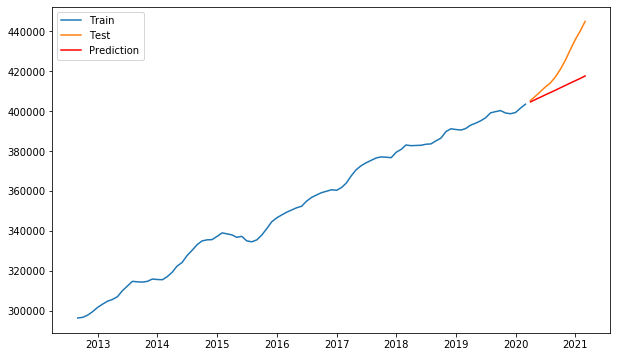

Model Explained Variance       r^2         MAE        RMSE  \
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1592.002, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1567.725, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1589.478, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1571.911, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1592.041, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1568.627, Time=0.08 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1568.618, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1570.609, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1588.136, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1583.542, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1571.725, Time=0.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 1.735 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -781.862
Date:                Thu, 27 May 2021   AIC                           1567.725
Time:                        01:29:48   BIC                           1572.724
Sample:                             0   HQIC                          1569.741
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    835.7778    166.945      5.006      0.000     508.572    1162.983
sigma2      2.057e+06   2.08e+05      9.897      0.000    1.65e+06    2.46e+06
===================================================================================
Ljung-Box (Q):                      134.70   Jarque-Bera (JB):                55.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.98
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

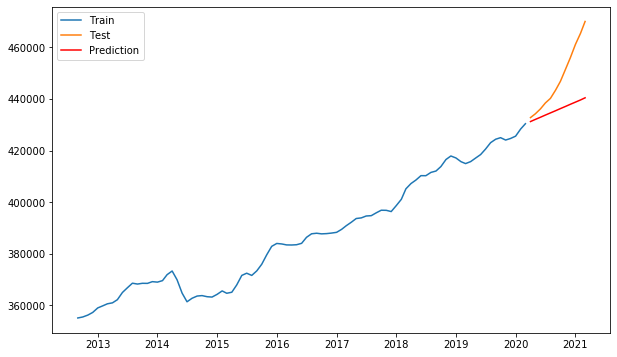

Model Explained Variance       r^2         MAE        RMSE  \
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1540.355, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1512.101, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1520.851, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1521.523, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1568.602, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1513.842, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1513.838, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1515.836, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1518.858, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1514.725, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1519.646, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 1.955 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -754.051
Date:                Thu, 27 May 2021   AIC                           1512.101
Time:                        01:29:50   BIC                           1517.101
Sample:                             0   HQIC                          1514.117
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1007.5000    110.998      9.077      0.000     789.948    1225.052
sigma2      1.109e+06   1.76e+05      6.291      0.000    7.63e+05    1.45e+06
===================================================================================
Ljung-Box (Q):                      154.80   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.00   Prob(JB):                         0.90
Heteroskedasticity (H):               0.80   Skew:                             0.01
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

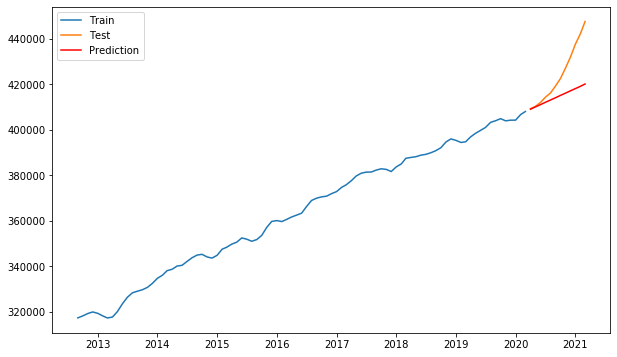

Model Explained Variance       r^2         MAE        RMSE  \
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=1644.617, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1638.540, Time=0.58 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1638.906, Time=0.03 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1638.932, Time=0.07 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1638.329, Time=0.07 sec
 ARIMA(0,2,0)(2,0,0)[12]             : AIC=1673.237, Time=0.11 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1642.258, Time=0.76 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1639.720, Time=0.05 sec
 ARIMA(0,2,0)(2,0,1)[12]             : AIC=1683.931, Time=0.38 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=1638.918, Time=0.08 sec
 ARIMA(1,2,1)(1,0,0)[12]             : AIC=1640.554, Time=0.29 sec
 ARIMA(0,2,0)(1,0,0)[12] intercept   : AIC=1640.356, Time=0.03 sec

Best model:  ARIMA(0,2,0)(1,0,0)[12]          
Total fit time: 2.895 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   91
Model:             SARIMAX(0, 2, 0)x(1, 0, 0, 12)   Log Likelihood                -817.165
Date:                            Thu, 27 May 2021   AIC                           1638.329
Time:                                    01:29:53   BIC                           1643.306
Sample:                                         0   HQIC                          1640.335
                                             - 91                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0051      0.006     -0.802      0.423      -0.018       0.007
sigma2       5.53e+06   3.96e-12   1.39e+18      0.000    5.53e+06    5.53e+06
===================================================================================
Ljung-Box (Q):                      118.41   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.00   Prob(JB):                         0.77
Heteroskedasticity (H):               1.15   Skew:                            -0.12
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

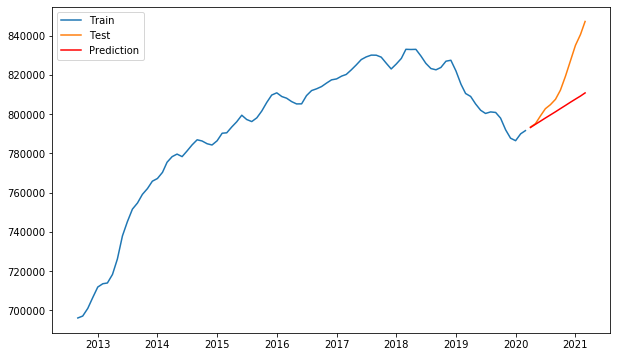

Model Explained Variance       r^2         MAE        RMSE  \
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1638.240, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1672.982, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1654.793, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1655.204, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1639.936, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1639.932, Time=0.07 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1641.922, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1671.031, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1653.016, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1634.675, Time=0.16 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1658.850, Time=0.17 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1636.054, Time=0.30 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(2,1,1)(0,0,0)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -811.538
Date:                Thu, 27 May 2021   AIC                           1629.077
Time:                        01:29:59   BIC                           1636.576
Sample:                             0   HQIC                          1632.101
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9654      0.014     67.691      0.000       0.937       0.993
ma.L1         -0.9568      0.016    -60.113      0.000      -0.988      -0.926
sigma2      3.975e+06   1.71e-10   2.32e+16      0.000    3.98e+06    3.98e+06
===================================================================================
Ljung-Box (Q):                      168.88   Jarque-Bera (JB):                 1.43
Prob(Q):                              0.00   Prob(JB):                         0.49
Heteroskedasticity (H):               0.87   Skew:                             0.21
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.31e+31. Standard errors may be unstable.
"""

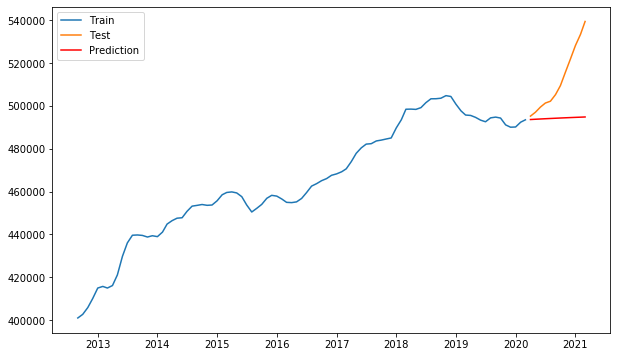

Model Explained Variance       r^2         MAE        RMSE  \
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1565.793, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1549.478, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1560.371, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1554.008, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1576.966, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1548.356, Time=0.08 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1550.462, Time=0.07 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1550.406, Time=0.10 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1548.438, Time=0.03 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1552.406, Time=0.29 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1554.192, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1551.814, Time=0.12 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=1579.089, Time=0.02 sec

Best model:  ARIMA(0,1,0)(1,0,0)[12] intercept
Total fit time: 1.502 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   91
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -771.178
Date:                            Thu, 27 May 2021   AIC                           1548.356
Time:                                    01:30:01   BIC                           1555.855
Sample:                                         0   HQIC                          1551.380
                                             - 91                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    827.4811    137.200      6.031      0.000     558.574    1096.388
ar.S.L12      -0.0112      0.028     -0.397      0.691      -0.067       0.044
sigma2      1.605e+06   2.42e+05      6.638      0.000    1.13e+06    2.08e+06
===================================================================================
Ljung-Box (Q):                      174.01   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.00   Prob(JB):                         0.93
Heteroskedasticity (H):               1.24   Skew:                             0.10
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

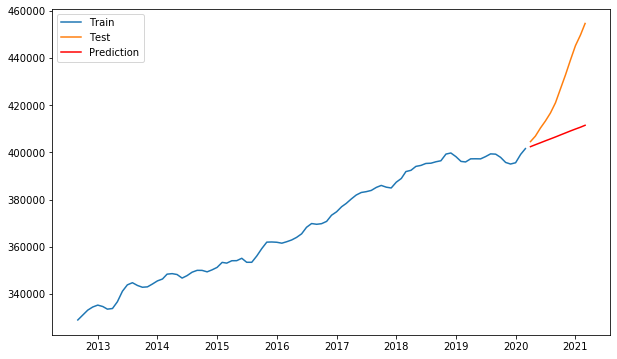

Model Explained Variance       r^2         MAE        RMSE  \
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.01 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1682.007, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1689.804, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1692.589, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1705.190, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1683.912, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1683.911, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1685.911, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1687.999, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1690.853, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1685.328, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 2.826 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -839.004
Date:                Thu, 27 May 2021   AIC                           1682.007
Time:                        01:30:04   BIC                           1687.007
Sample:                             0   HQIC                          1684.023
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1537.5778    327.904      4.689      0.000     894.897    2180.259
sigma2      7.324e+06   1.04e+06      7.044      0.000    5.29e+06    9.36e+06
===================================================================================
Ljung-Box (Q):                       99.89   Jarque-Bera (JB):                13.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             0.84
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

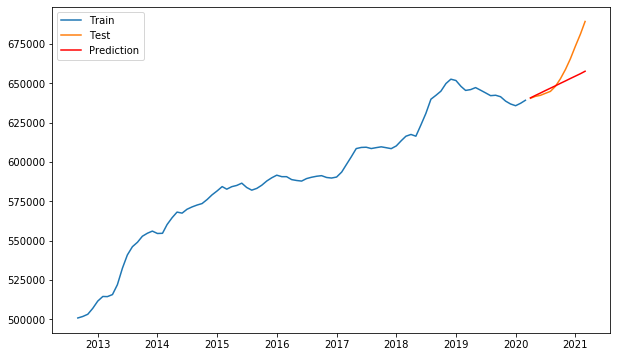

Model Explained Variance       r^2         MAE        RMSE  \
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=1620.549, Time=0.66 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1611.448, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1615.075, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1615.070, Time=0.10 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1622.538, Time=0.03 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1613.187, Time=0.10 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1620.977, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1613.319, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1613.315, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1614.135, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1613.430, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 1.287 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -804.724
Date:                Thu, 27 May 2021   AIC                           1611.448
Time:                        01:30:05   BIC                           1613.937
Sample:                             0   HQIC                          1612.451
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.108e+06   6.97e+05      5.897      0.000    2.74e+06    5.47e+06
===================================================================================
Ljung-Box (Q):                      100.91   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.00   Prob(JB):                         0.63
Heteroskedasticity (H):               0.89   Skew:                             0.04
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

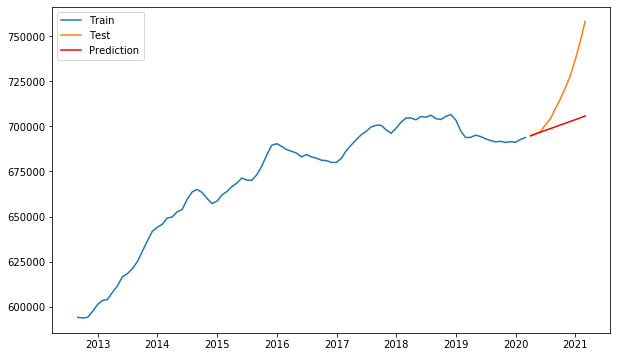

Model Explained Variance       r^2         MAE        RMSE  \
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1599.753, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1567.083, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1594.501, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1578.781, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1590.994, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1568.876, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1568.873, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1570.869, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1572.313, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1576.922, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1581.555, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 0.742 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -781.542
Date:                Thu, 27 May 2021   AIC                           1567.083
Time:                        01:30:06   BIC                           1572.083
Sample:                             0   HQIC                          1569.099
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    825.4000    150.710      5.477      0.000     530.014    1120.786
sigma2      2.043e+06   3.24e+05      6.312      0.000    1.41e+06    2.68e+06
===================================================================================
Ljung-Box (Q):                      185.19   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.00   Prob(JB):                         0.90
Heteroskedasticity (H):               0.99   Skew:                            -0.04
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

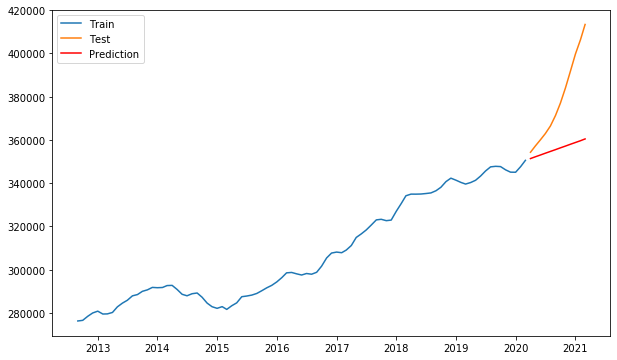

Model Explained Variance       r^2         MAE        RMSE  \
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1733.808, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1682.505, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1717.789, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1693.142, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1690.752, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1683.745, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1683.741, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1685.734, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1716.500, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1691.990, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1682.558, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 1.072 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -839.253
Date:                Thu, 27 May 2021   AIC                           1682.505
Time:                        01:30:08   BIC                           1687.505
Sample:                             0   HQIC                          1684.521
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    942.1000    286.178      3.292      0.001     381.202    1502.998
sigma2      7.364e+06   8.09e+05      9.108      0.000    5.78e+06    8.95e+06
===================================================================================
Ljung-Box (Q):                      151.15   Jarque-Bera (JB):                10.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.06
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

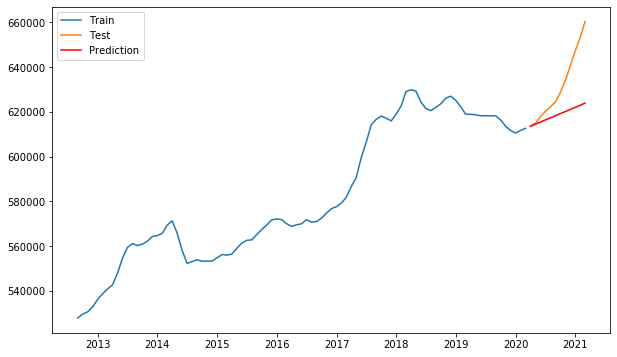

Model Explained Variance       r^2         MAE        RMSE  \
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=1554.597, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1547.405, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1548.192, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1548.323, Time=0.06 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1553.840, Time=0.02 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1548.101, Time=0.04 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1557.685, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1549.232, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1549.189, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1552.869, Time=0.01 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1549.405, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.769 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -772.703
Date:                Thu, 27 May 2021   AIC                           1547.405
Time:                        01:30:09   BIC                           1549.894
Sample:                             0   HQIC                          1548.408
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.035e+06   3.36e+05      6.051      0.000    1.38e+06    2.69e+06
===================================================================================
Ljung-Box (Q):                      123.36   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.00   Prob(JB):                         0.79
Heteroskedasticity (H):               0.96   Skew:                            -0.00
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

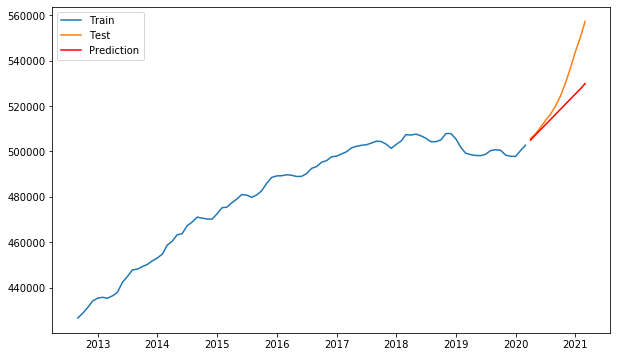

Model Explained Variance       r^2         MAE        RMSE  \
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1511.125, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1513.937, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1510.303, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1511.069, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1557.538, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1512.821, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1523.621, Time=0.09 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1512.199, Time=0.22 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1523.182, Time=0.04 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1510.367, Time=0.27 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1510.995, Time=0.06 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1506.001, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1509.110, Time=0.14 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1513.456, Time=0.16 sec
 ARIMA(2,1,0)(1,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   91
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -747.488
Date:                            Thu, 27 May 2021   AIC                           1504.977
Time:                                    01:30:16   BIC                           1517.476
Sample:                                         0   HQIC                          1510.017
                                             - 91                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    522.4934    371.092      1.408      0.159    -204.834    1249.821
ar.L1          0.3916      0.421      0.931      0.352      -0.433       1.216
ma.L1         -0.3732      0.427     -0.875      0.382      -1.209       0.463
ma.S.L12      -0.0150      0.024     -0.634      0.526      -0.061       0.031
sigma2      9.534e+05   1.47e+05      6.481      0.000    6.65e+05    1.24e+06
===================================================================================
Ljung-Box (Q):                       92.99   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.00   Prob(JB):                         1.00
Heteroskedasticity (H):               1.64   Skew:                            -0.01
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

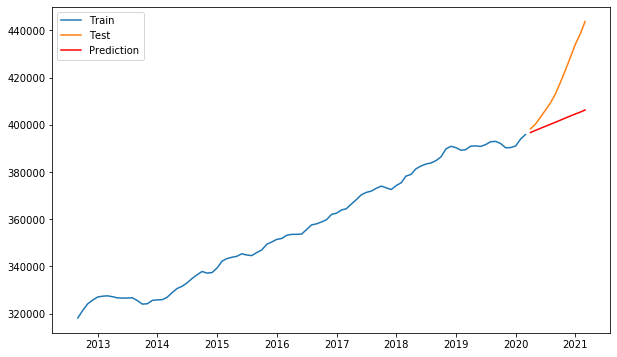

Model Explained Variance       r^2         MAE        RMSE  \
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=1754.924, Time=0.38 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1752.720, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1752.681, Time=0.04 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1752.634, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1752.787, Time=0.02 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=1754.434, Time=0.84 sec
 ARIMA(0,2,1)(0,0,2)[12]             : AIC=1754.428, Time=0.09 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=1752.627, Time=0.05 sec
 ARIMA(0,2,1)(2,0,0)[12]             : AIC=1754.427, Time=0.34 sec
 ARIMA(0,2,1)(2,0,1)[12]             : AIC=1756.446, Time=0.13 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1764.362, Time=0.04 sec
 ARIMA(1,2,1)(1,0,0)[12]             : AIC=1760.206, Time=0.06 sec
 ARIMA(0,2,2)(1,0,0)[12]             : AIC=1754.586, Time=0.11 sec
 ARIMA(1,2,2)(1,0,0)[12]             : AIC=1756.613, Time=0.08 sec
 ARIMA(0,2,1)(1,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   91
Model:             SARIMAX(0, 2, 1)x(1, 0, [], 12)   Log Likelihood                -873.314
Date:                             Thu, 27 May 2021   AIC                           1752.627
Time:                                     01:30:19   BIC                           1760.093
Sample:                                          0   HQIC                          1755.637
                                              - 91                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0064      0.102     -0.063      0.950      -0.206       0.193
ar.S.L12      -0.0049      0.008     -0.578      0.564      -0.021       0.012
sigma2      1.955e+07   4.99e-10   3.92e+16      0.000    1.95e+07    1.95e+07
===================================================================================
Ljung-Box (Q):                      180.09   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.00   Prob(JB):                         0.99
Heteroskedasticity (H):               0.95   Skew:                             0.02
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.3e+32. Standard errors may be unstable.
"""

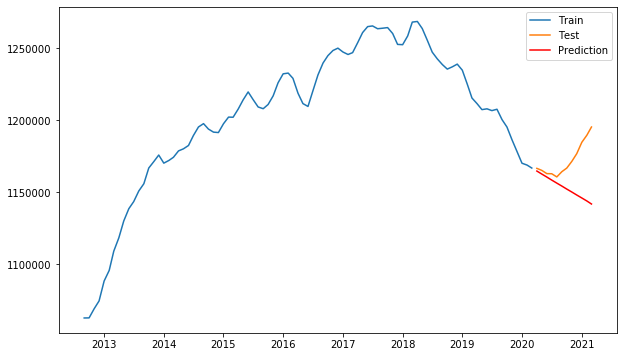

Model Explained Variance       r^2         MAE        RMSE  \
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=1635.274, Time=0.87 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1647.620, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1649.410, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1649.402, Time=0.03 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=1633.671, Time=0.60 sec
 ARIMA(2,2,2)(0,0,0)[12]             : AIC=1652.509, Time=0.13 sec
 ARIMA(2,2,2)(0,0,2)[12]             : AIC=1654.651, Time=0.66 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=1652.684, Time=0.28 sec
 ARIMA(2,2,2)(1,0,2)[12]             : AIC=1636.996, Time=1.88 sec
 ARIMA(1,2,2)(0,0,1)[12]             : AIC=1650.781, Time=0.22 sec
 ARIMA(2,2,1)(0,0,1)[12]             : AIC=1652.411, Time=0.19 sec
 ARIMA(3,2,2)(0,0,1)[12]             : AIC=1661.817, Time=0.98 sec
 ARIMA(2,2,3)(0,0,1)[12]             : AIC=1636.136, Time=0.47 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=1652.071, Time=0.09 sec
 ARIMA(1,2,3)(0,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   91
Model:             SARIMAX(2, 2, 2)x(0, 0, [1], 12)   Log Likelihood                -810.835
Date:                              Thu, 27 May 2021   AIC                           1633.671
Time:                                      01:30:28   BIC                           1648.603
Sample:                                           0   HQIC                          1639.689
                                               - 91                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5833      0.034     16.965      0.000       0.516       0.651
ar.L2         -0.9262      0.039    -23.986      0.000      -1.002      -0.851
ma.L1         -0.5905      0.034    -17.278      0.000      -0.658      -0.524
ma.L2          0.9244      0.040     23.318      0.000       0.847       1.002
ma.S.L12      -0.0020      0.004     -0.471      0.637      -0.010       0.006
sigma2      5.198e+06   1.07e-09   4.84e+15      0.000     5.2e+06     5.2e+06
===================================================================================
Ljung-Box (Q):                      183.90   Jarque-Bera (JB):                 1.16
Prob(Q):                              0.00   Prob(JB):                         0.56
Heteroskedasticity (H):               1.53   Skew:                             0.17
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.61e+31. Standard errors may be unstable.
"""

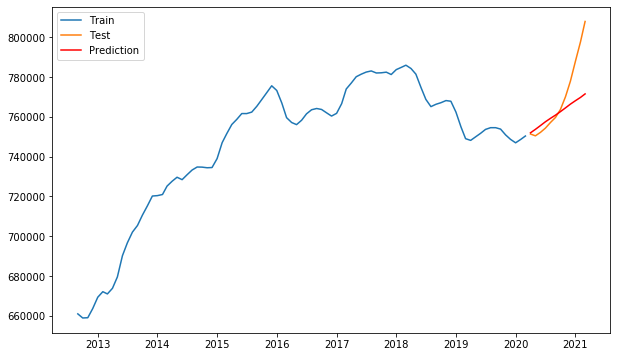

Model Explained Variance       r^2         MAE        RMSE  \
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=1598.849, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1588.663, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1592.199, Time=0.03 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1592.202, Time=0.03 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1596.911, Time=0.05 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1592.493, Time=0.04 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1599.849, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1590.566, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1590.566, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1592.560, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1590.645, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.768 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -793.331
Date:                Thu, 27 May 2021   AIC                           1588.663
Time:                        01:30:29   BIC                           1591.151
Sample:                             0   HQIC                          1589.666
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.182e+06   4.63e+05      6.876      0.000    2.28e+06    4.09e+06
===================================================================================
Ljung-Box (Q):                       83.55   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.00   Prob(JB):                         0.99
Heteroskedasticity (H):               0.93   Skew:                             0.02
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

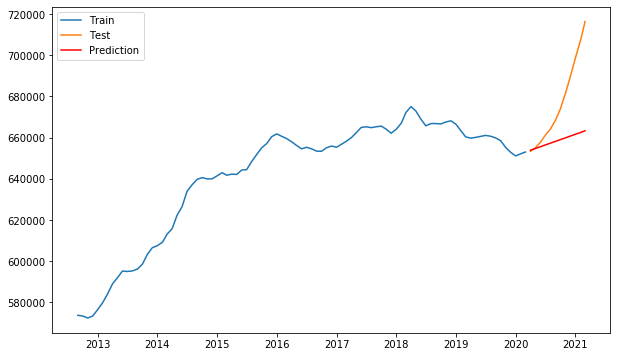

Model Explained Variance       r^2         MAE        RMSE  \
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=1540.126, Time=0.61 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1531.868, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1532.918, Time=0.03 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1532.984, Time=0.03 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1543.268, Time=0.02 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1532.240, Time=0.03 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1545.676, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1533.359, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1533.373, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1534.970, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1533.865, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 1.053 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -764.934
Date:                Thu, 27 May 2021   AIC                           1531.868
Time:                        01:30:30   BIC                           1534.357
Sample:                             0   HQIC                          1532.871
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.709e+06   2.53e+05      6.747      0.000    1.21e+06    2.21e+06
===================================================================================
Ljung-Box (Q):                      139.43   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.00   Prob(JB):                         0.99
Heteroskedasticity (H):               1.21   Skew:                            -0.01
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

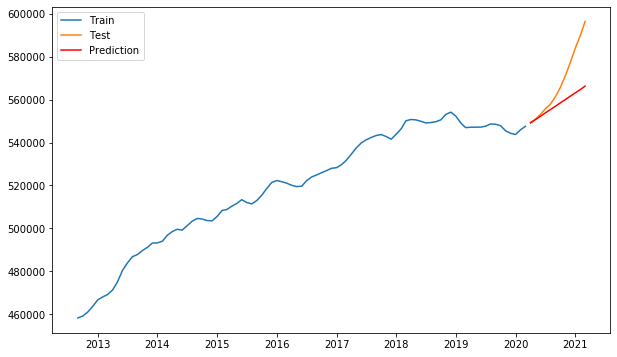

Model Explained Variance       r^2         MAE        RMSE  \
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

In [80]:
for column in df.columns:
    ts = df[column]
    train_12mo, test_12mo = model_selection.train_test_split(ts, test_size=12)
    arima = pm.auto_arima(train_12mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100)
    arima_eval(f"{column}", ts, train_12mo, test_12mo, arima);

## Without Seasonality

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1480.251, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1483.875, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1537.644, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1494.465, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1548.123, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1501.545, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1500.985, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1482.330, Time=0.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1498.226, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1490.728, Time=0.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1502.831, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.37 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=nan sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
To

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -734.126
Date:                Thu, 27 May 2021   AIC                           1480.251
Time:                        15:26:07   BIC                           1495.250
Sample:                             0   HQIC                          1486.300
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    645.9287     51.309     12.589      0.000     545.366     746.492
ar.L1          1.2335      0.018     68.968      0.000       1.198       1.269
ar.L2         -0.9539      0.020    -47.149      0.000      -0.994      -0.914
ma.L1         -1.2299      0.017    -72.440      0.000      -1.263      -1.197
ma.L2          0.9633      0.018     52.829      0.000       0.928       0.999
sigma2      4.764e+05      0.007   6.56e+07      0.000    4.76e+05    4.76e+05
===================================================================================
Ljung-Box (Q):                       98.52   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.00   Prob(JB):                         0.63
Heteroskedasticity (H):               1.13   Skew:                             0.25
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.13e+23. Standard errors may be unstable.
"""

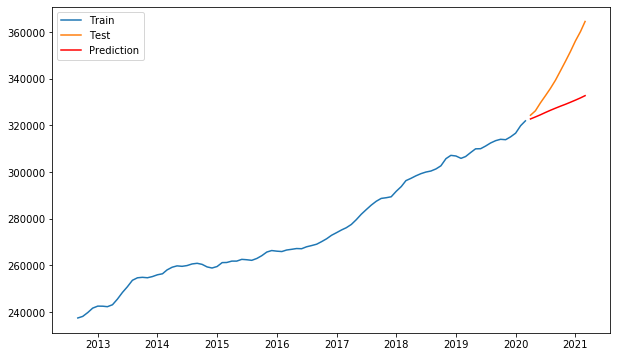

Model Explained Variance       r^2         MAE        RMSE  \
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1608.933, Time=1.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1583.564, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1615.512, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1593.152, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1606.810, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1605.308, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.048 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -789.782
Date:                Thu, 27 May 2021   AIC                           1583.564
Time:                        15:26:11   BIC                           1588.563
Sample:                             0   HQIC                          1585.580
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    891.1222    175.532      5.077      0.000     547.086    1235.158
sigma2      2.453e+06   3.29e+05      7.452      0.000    1.81e+06     3.1e+06
===================================================================================
Ljung-Box (Q):                      301.87   Jarque-Bera (JB):                 7.17
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               0.51   Skew:                            -0.57
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

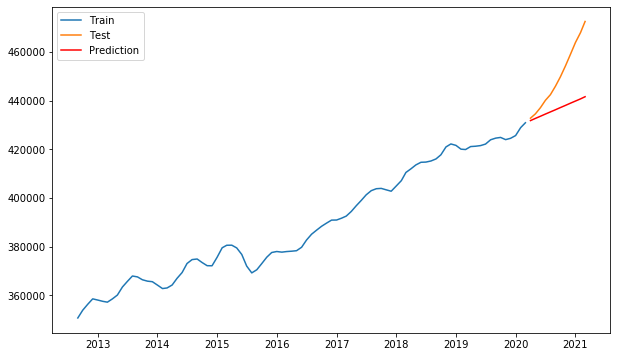

Model Explained Variance       r^2         MAE        RMSE  \
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 12)  1567.72

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1571.327, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1573.325, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1580.672, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1602.107, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1609.173, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.149 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -783.664
Date:                Thu, 27 May 2021   AIC                           1571.327
Time:                        15:26:14   BIC                           1576.327
Sample:                             0   HQIC                          1573.343
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    969.8667    164.833      5.884      0.000     646.800    1292.933
sigma2      2.141e+06    3.2e+05      6.701      0.000    1.51e+06    2.77e+06
===================================================================================
Ljung-Box (Q):                      176.12   Jarque-Bera (JB):                 4.54
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               0.67   Skew:                             0.53
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

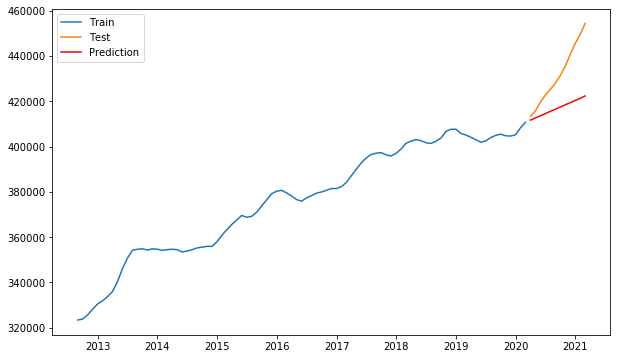

Model Explained Variance       r^2         MAE        RMSE  \
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
33   (0, 1, 0)   (0, 0, 0, 0)  1571.33  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499.77  
2    (0, 1, 0)  (0, 0, 0, 12)  1158.52  
1    (0, 1, 0)  (0, 0, 0, 12)  1364.27  
0    (0, 1, 0)  (0, 0, 0, 1

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1553.840, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1532.574, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1576.549, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1534.713, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1593.709, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1542.188, Time=0.57 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.133 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -764.287
Date:                Thu, 27 May 2021   AIC                           1532.574
Time:                        15:26:18   BIC                           1537.573
Sample:                             0   HQIC                          1534.590
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1189.6333    125.007      9.517      0.000     944.625    1434.642
sigma2      1.392e+06    2.2e+05      6.328      0.000    9.61e+05    1.82e+06
===================================================================================
Ljung-Box (Q):                      203.93   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.00   Prob(JB):                         0.81
Heteroskedasticity (H):               0.98   Skew:                            -0.14
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

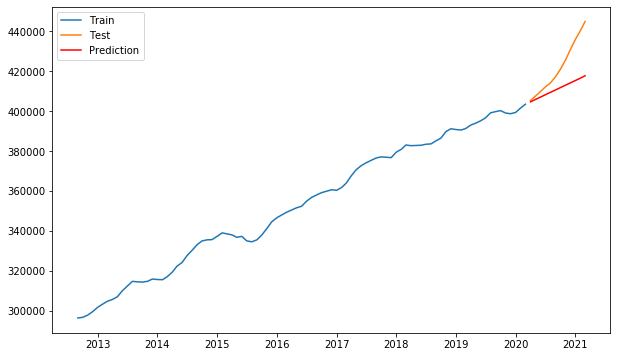

Model Explained Variance       r^2         MAE        RMSE  \
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
34   (0, 1, 0)   (0, 0, 0, 0)  1532.57  
33   (0, 1, 0)   (0, 0, 0, 0)  1571.33  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5    (2, 0, 1)  (2, 0, 0, 12)  1102.19  
4    (2, 0, 1)  (2, 0, 0, 12)  1298.80  
3    (4, 0, 0)  (2, 0, 0, 12)  1499

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1590.069, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1567.725, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1588.136, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1583.542, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1592.041, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1571.725, Time=0.45 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.421 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -781.862
Date:                Thu, 27 May 2021   AIC                           1567.725
Time:                        15:26:22   BIC                           1572.724
Sample:                             0   HQIC                          1569.741
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    835.7778    166.945      5.006      0.000     508.572    1162.983
sigma2      2.057e+06   2.08e+05      9.897      0.000    1.65e+06    2.46e+06
===================================================================================
Ljung-Box (Q):                      134.70   Jarque-Bera (JB):                55.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.98
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

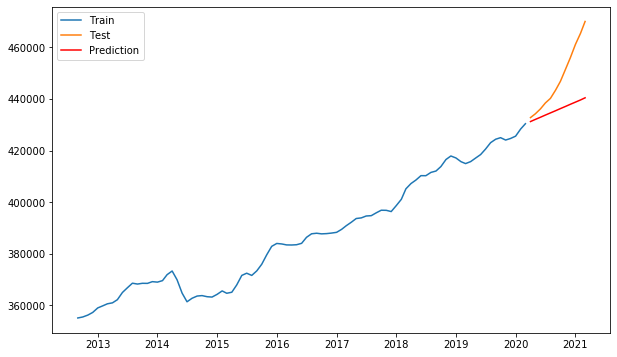

Model Explained Variance       r^2         MAE        RMSE  \
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
35   (0, 1, 0)   (0, 0, 0, 0)  1567.72  
34   (0, 1, 0)   (0, 0, 0, 0)  1532.57  
33   (0, 1, 0)   (0, 0, 0, 0)  1571.33  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0, 0)  (2, 0, 0, 12)  1116.56  
7    (2, 0, 0)  (2, 0, 0, 12)  1311.38  
6    (2, 0, 2)  (2, 0, 0, 12)  1493.21  
5 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1536.661, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1512.101, Time=1.99 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1518.858, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1514.725, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1568.602, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1519.646, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.501 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -754.051
Date:                Thu, 27 May 2021   AIC                           1512.101
Time:                        15:26:25   BIC                           1517.101
Sample:                             0   HQIC                          1514.117
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1007.5000    110.998      9.077      0.000     789.948    1225.052
sigma2      1.109e+06   1.76e+05      6.291      0.000    7.63e+05    1.45e+06
===================================================================================
Ljung-Box (Q):                      154.80   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.00   Prob(JB):                         0.90
Heteroskedasticity (H):               0.80   Skew:                             0.01
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

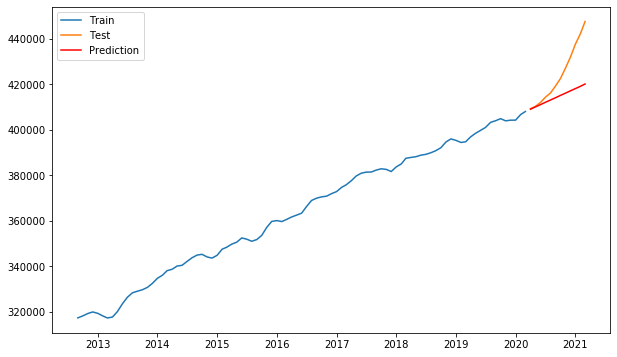

Model Explained Variance       r^2         MAE        RMSE  \
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
36   (0, 1, 0)   (0, 0, 0, 0)  1512.10  
35   (0, 1, 0)   (0, 0, 0, 0)  1567.72  
34   (0, 1, 0)   (0, 0, 0, 0)  1532.57  
33   (0, 1, 0)   (0, 0, 0, 0)  1571.33  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
10   (0, 1, 3)  (0, 0, 1, 12)  -827.92  
9    (0, 1, 3)  (0, 0, 1, 12)  -827.92  
8    (4, 0

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1643.220, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1638.540, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1639.075, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1639.071, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1642.447, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1640.517, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.380 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -818.270
Date:                Thu, 27 May 2021   AIC                           1638.540
Time:                        15:26:26   BIC                           1641.028
Sample:                             0   HQIC                          1639.543
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.541e+06   8.91e+05      6.217      0.000    3.79e+06    7.29e+06
===================================================================================
Ljung-Box (Q):                      125.82   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.00   Prob(JB):                         0.68
Heteroskedasticity (H):               1.10   Skew:                            -0.15
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

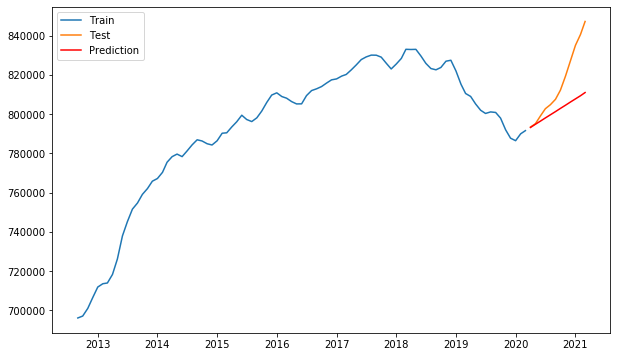

Model Explained Variance       r^2         MAE        RMSE  \
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
37   (0, 2, 0)   (0, 0, 0, 0)  1638.54  
36   (0, 1, 0)   (0, 0, 0, 0)  1512.10  
35   (0, 1, 0)   (0, 0, 0, 0)  1567.72  
34   (0, 1, 0)   (0, 0, 0, 0)  1532.57  
33   (0, 1, 0)   (0, 0, 0, 0)  1571.33  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 12)  1571.33  
13   (0, 1, 0)  (0, 0, 0, 12)  1583.56  
12   (0, 1, 0)  (0, 0, 0, 12)  1483.88  
11   (0, 1, 3)  (0

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1638.240, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1671.031, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1653.016, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1655.204, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1634.675, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1664.605, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1670.524, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1677.562, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1676.181, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1629.077, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1669.534, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1655.840, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1644.991, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0]             : A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -811.538
Date:                Thu, 27 May 2021   AIC                           1629.077
Time:                        15:26:32   BIC                           1636.576
Sample:                             0   HQIC                          1632.101
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9654      0.014     67.691      0.000       0.937       0.993
ma.L1         -0.9568      0.016    -60.113      0.000      -0.988      -0.926
sigma2      3.975e+06   1.71e-10   2.32e+16      0.000    3.98e+06    3.98e+06
===================================================================================
Ljung-Box (Q):                      168.88   Jarque-Bera (JB):                 1.43
Prob(Q):                              0.00   Prob(JB):                         0.49
Heteroskedasticity (H):               0.87   Skew:                             0.21
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.31e+31. Standard errors may be unstable.
"""

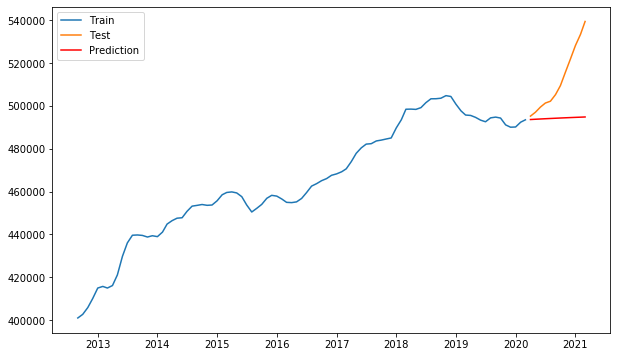

Model Explained Variance       r^2         MAE        RMSE  \
38           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
38   (1, 1, 1)   (0, 0, 0, 0)  1629.08  
37   (0, 2, 0)   (0, 0, 0, 0)  1638.54  
36   (0, 1, 0)   (0, 0, 0, 0)  1512.10  
35   (0, 1, 0)   (0, 0, 0, 0)  1567.72  
34   (0, 1, 0)   (0, 0, 0, 0)  1532.57  
33   (0, 1, 0)   (0, 0, 0, 0)  1571.33  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  1512.10  
16   (0, 1, 0)  (0, 0, 0, 12)  1567.72  
15   (0, 1, 0)  (1, 0, 0, 12)  1532.46  
14   (0, 1, 0)  (0, 0, 0, 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1527.736, Time=2.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1549.478, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1560.728, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1554.997, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1576.966, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1560.964, Time=0.83 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1552.949, Time=2.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1573.981, Time=0.89 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1535.232, Time=1.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1551.282, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1584.540, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1566.062, Time=0.32 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1570.582, Time=1.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=1.25 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -757.868
Date:                Thu, 27 May 2021   AIC                           1527.736
Time:                        15:26:43   BIC                           1542.734
Sample:                             0   HQIC                          1533.784
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    722.5593     72.237     10.003      0.000     580.978     864.141
ar.L1          1.2655      0.013     94.994      0.000       1.239       1.292
ar.L2         -0.9685      0.012    -78.029      0.000      -0.993      -0.944
ma.L1         -1.2583      0.013    -96.838      0.000      -1.284      -1.233
ma.L2          0.9700      0.013     76.275      0.000       0.945       0.995
sigma2      1.009e+06      0.014   7.14e+07      0.000    1.01e+06    1.01e+06
===================================================================================
Ljung-Box (Q):                      156.34   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.00   Prob(JB):                         0.87
Heteroskedasticity (H):               1.98   Skew:                            -0.01
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.72e+23. Standard errors may be unstable.
"""

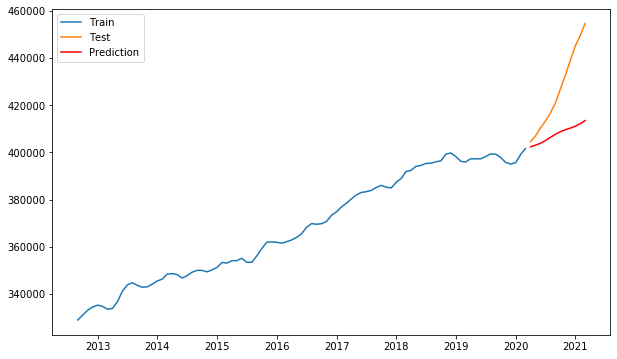

Model Explained Variance       r^2         MAE        RMSE  \
39           7607             37.51%   -92.69%  $18,940.77  $23,042.41   
38           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
39   (2, 1, 2)   (0, 0, 0, 0)  1527.74  
38   (1, 1, 1)   (0, 0, 0, 0)  1629.08  
37   (0, 2, 0)   (0, 0, 0, 0)  1638.54  
36   (0, 1, 0)   (0, 0, 0, 0)  1512.10  
35   (0, 1, 0)   (0, 0, 0, 0)  1567.72  
34   (0, 1, 0)   (0, 0, 0, 0)  1532.57  
33   (0, 1, 0)   (0, 0, 0, 0)  1571.33  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
19   (1, 1, 1)  (0, 0, 0, 12)  1629.08  
18   (0, 2, 0)  (1, 0, 0, 12)  1638.33  
17   (0, 1, 0)  (0, 0, 0, 12)  151

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1720.679, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1682.007, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1687.999, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1690.853, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1705.190, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1685.328, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.626 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -839.004
Date:                Thu, 27 May 2021   AIC                           1682.007
Time:                        15:26:44   BIC                           1687.007
Sample:                             0   HQIC                          1684.023
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1537.5778    327.904      4.689      0.000     894.897    2180.259
sigma2      7.324e+06   1.04e+06      7.044      0.000    5.29e+06    9.36e+06
===================================================================================
Ljung-Box (Q):                       99.89   Jarque-Bera (JB):                13.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             0.84
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

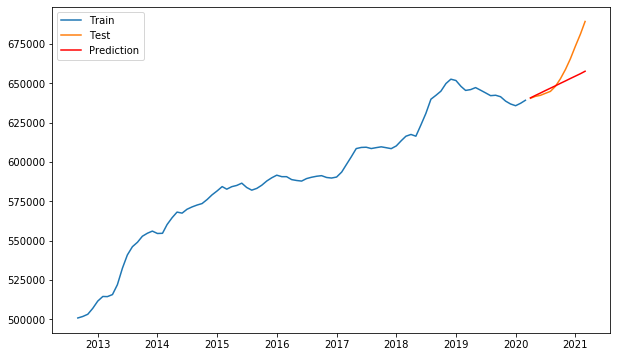

Model Explained Variance       r^2         MAE        RMSE  \
40           7626             51.47%    28.85%   $8,756.52  $13,636.43   
39           7607             37.51%   -92.69%  $18,940.77  $23,042.41   
38           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
40   (0, 1, 0)   (0, 0, 0, 0)  1682.01  
39   (2, 1, 2)   (0, 0, 0, 0)  1527.74  
38   (1, 1, 1)   (0, 0, 0, 0)  1629.08  
37   (0, 2, 0)   (0, 0, 0, 0)  1638.54  
36   (0, 1, 0)   (0, 0, 0, 0)  1512.10  
35   (0, 1, 0)   (0, 0, 0, 0)  1567.72  
34   (0, 1, 0)   (0, 0, 0, 0)  1532.57  
33   (0, 1, 0)   (0, 0, 0, 0)  1571.33  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 2, 0)  (0, 0, 0, 12)  1611.45  
21   (0, 1, 0)  (0, 0, 0, 12)  1682.01  
20   (0, 1, 0)  (1, 0, 0, 12)  1548.36  
1

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1616.838, Time=0.43 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1611.448, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1613.319, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1613.315, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1614.135, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1613.430, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.847 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -804.724
Date:                Thu, 27 May 2021   AIC                           1611.448
Time:                        15:26:46   BIC                           1613.937
Sample:                             0   HQIC                          1612.451
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.108e+06   6.97e+05      5.897      0.000    2.74e+06    5.47e+06
===================================================================================
Ljung-Box (Q):                      100.91   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.00   Prob(JB):                         0.63
Heteroskedasticity (H):               0.89   Skew:                             0.04
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

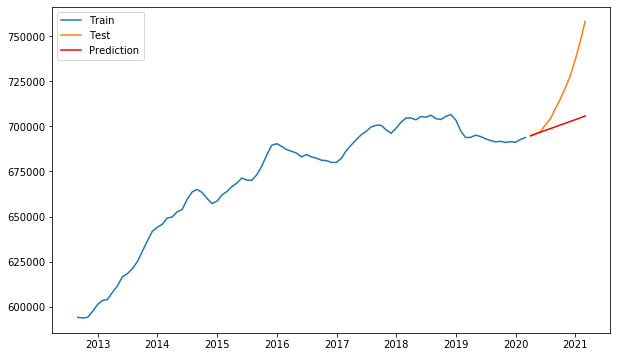

Model Explained Variance       r^2         MAE        RMSE  \
41           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
40           7626             51.47%    28.85%   $8,756.52  $13,636.43   
39           7607             37.51%   -92.69%  $18,940.77  $23,042.41   
38           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
41   (0, 2, 0)   (0, 0, 0, 0)  1611.45  
40   (0, 1, 0)   (0, 0, 0, 0)  1682.01  
39   (2, 1, 2)   (0, 0, 0, 0)  1527.74  
38   (1, 1, 1)   (0, 0, 0, 0)  1629.08  
37   (0, 2, 0)   (0, 0, 0, 0)  1638.54  
36   (0, 1, 0)   (0, 0, 0, 0)  1512.10  
35   (0, 1, 0)   (0, 0, 0, 0)  1567.72  
34   (0, 1, 0)   (0, 0, 0, 0)  1532.57  
33   (0, 1, 0)   (0, 0, 0, 0)  1571.33  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (0, 0, 0, 12)  1547.41  
24   (0, 1, 0)  (0, 0, 0, 12)  1682.51  
23   (0, 1, 0)  (0, 0, 0, 12)  1567.08  
22   (0, 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1587.278, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1567.083, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1572.313, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1576.922, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1590.994, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1581.555, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.066 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -781.542
Date:                Thu, 27 May 2021   AIC                           1567.083
Time:                        15:26:47   BIC                           1572.083
Sample:                             0   HQIC                          1569.099
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    825.4000    150.710      5.477      0.000     530.014    1120.786
sigma2      2.043e+06   3.24e+05      6.312      0.000    1.41e+06    2.68e+06
===================================================================================
Ljung-Box (Q):                      185.19   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.00   Prob(JB):                         0.90
Heteroskedasticity (H):               0.99   Skew:                            -0.04
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

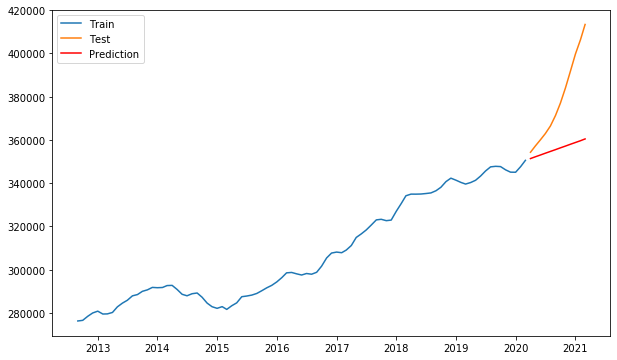

Model Explained Variance       r^2         MAE        RMSE  \
42           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
41           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
40           7626             51.47%    28.85%   $8,756.52  $13,636.43   
39           7607             37.51%   -92.69%  $18,940.77  $23,042.41   
38           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
42   (0, 1, 0)   (0, 0, 0, 0)  1567.08  
41   (0, 2, 0)   (0, 0, 0, 0)  1611.45  
40   (0, 1, 0)   (0, 0, 0, 0)  1682.01  
39   (2, 1, 2)   (0, 0, 0, 0)  1527.74  
38   (1, 1, 1)   (0, 0, 0, 0)  1629.08  
37   (0, 2, 0)   (0, 0, 0, 0)  1638.54  
36   (0, 1, 0)   (0, 0, 0, 0)  1512.10  
35   (0, 1, 0)   (0, 0, 0, 0)  1567.72  
34   (0, 1, 0)   (0, 0, 0, 0)  1532.57  
33   (0, 1, 0)   (0, 0, 0, 0)  1571.33  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1, 12)  1633.67  
27   (0, 2, 1)  (1, 0, 0, 12)  1752.63  
26   (1, 1, 1)  (0, 0, 1, 12)  1504.98  
25   (0, 2, 0)  (

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1729.790, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1682.505, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1716.500, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1691.990, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1690.752, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1682.558, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.425 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -839.253
Date:                Thu, 27 May 2021   AIC                           1682.505
Time:                        15:26:49   BIC                           1687.505
Sample:                             0   HQIC                          1684.521
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    942.1000    286.178      3.292      0.001     381.202    1502.998
sigma2      7.364e+06   8.09e+05      9.108      0.000    5.78e+06    8.95e+06
===================================================================================
Ljung-Box (Q):                      151.15   Jarque-Bera (JB):                10.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.06
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

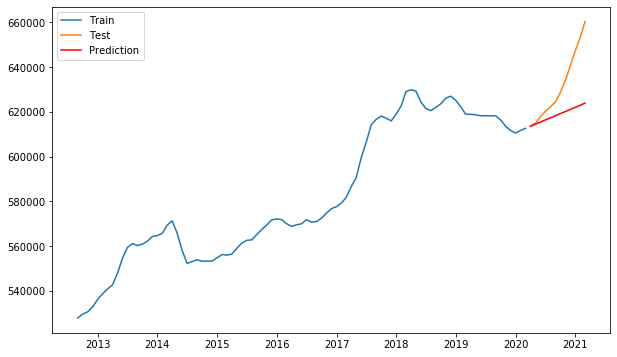

Model Explained Variance       r^2         MAE        RMSE  \
43           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
42           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
41           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
40           7626             51.47%    28.85%   $8,756.52  $13,636.43   
39           7607             37.51%   -92.69%  $18,940.77  $23,042.41   
38           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
43   (0, 1, 0)   (0, 0, 0, 0)  1682.51  
42   (0, 1, 0)   (0, 0, 0, 0)  1567.08  
41   (0, 2, 0)   (0, 0, 0, 0)  1611.45  
40   (0, 1, 0)   (0, 0, 0, 0)  1682.01  
39   (2, 1, 2)   (0, 0, 0, 0)  1527.74  
38   (1, 1, 1)   (0, 0, 0, 0)  1629.08  
37   (0, 2, 0)   (0, 0, 0, 0)  1638.54  
36   (0, 1, 0)   (0, 0, 0, 0)  1512.10  
35   (0, 1, 0)   (0, 0, 0, 0)  1567.72  
34   (0, 1, 0)   (0, 0, 0, 0)  1532.57  
33   (0, 1, 0)   (0, 0, 0, 0)  1571.33  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  1480.25  
30   (0, 2, 0)  (0, 0, 0, 12)  1531.87  
29   (0, 2, 0)  (0, 0, 0, 12)  1588.66  
28   (2, 2, 2)  (0, 0, 1,

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1554.644, Time=0.63 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1547.405, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1549.232, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1549.189, Time=0.22 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1552.869, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1549.405, Time=0.04 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.067 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -772.703
Date:                Thu, 27 May 2021   AIC                           1547.405
Time:                        15:26:51   BIC                           1549.894
Sample:                             0   HQIC                          1548.408
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.035e+06   3.36e+05      6.051      0.000    1.38e+06    2.69e+06
===================================================================================
Ljung-Box (Q):                      123.36   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.00   Prob(JB):                         0.79
Heteroskedasticity (H):               0.96   Skew:                            -0.00
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

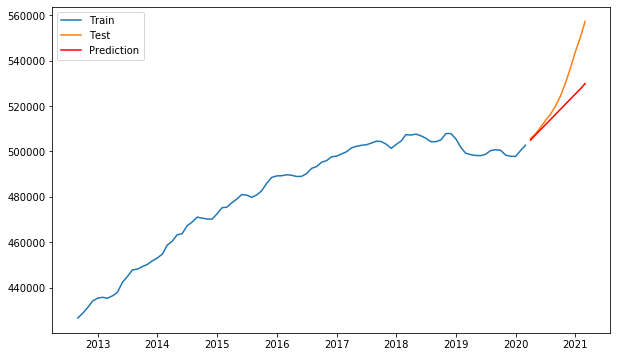

Model Explained Variance       r^2         MAE        RMSE  \
44           7630             70.15%    40.96%   $8,972.58  $12,759.96   
43           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
42           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
41           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
40           7626             51.47%    28.85%   $8,756.52  $13,636.43   
39           7607             37.51%   -92.69%  $18,940.77  $23,042.41   
38           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
44   (0, 2, 0)   (0, 0, 0, 0)  1547.41  
43   (0, 1, 0)   (0, 0, 0, 0)  1682.51  
42   (0, 1, 0)   (0, 0, 0, 0)  1567.08  
41   (0, 2, 0)   (0, 0, 0, 0)  1611.45  
40   (0, 1, 0)   (0, 0, 0, 0)  1682.01  
39   (2, 1, 2)   (0, 0, 0, 0)  1527.74  
38   (1, 1, 1)   (0, 0, 0, 0)  1629.08  
37   (0, 2, 0)   (0, 0, 0, 0)  1638.54  
36   (0, 1, 0)   (0, 0, 0, 0)  1512.10  
35   (0, 1, 0)   (0, 0, 0, 0)  1567.72  
34   (0, 1, 0)   (0, 0, 0, 0)  1532.57  
33   (0, 1, 0)   (0, 0, 0, 0)  1571.33  
32   (0, 1, 0)   (0, 0, 0, 0)  1583.56  
31   (2, 1, 2)   (0, 0, 0, 0)  14

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1514.721, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1513.937, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1512.821, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1514.387, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1557.538, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1509.110, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1513.734, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1511.310, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1510.186, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1513.264, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1559.898, Time=0.02 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 1.843 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -750.555
Date:                Thu, 27 May 2021   AIC                           1509.110
Time:                        15:26:53   BIC                           1519.109
Sample:                             0   HQIC                          1513.142
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    682.4100    134.459      5.075      0.000     418.876     945.944
ar.L1          0.0163      0.024      0.666      0.506      -0.032       0.064
ar.L2          0.0129      0.087      0.148      0.882      -0.158       0.184
sigma2      1.115e+06   1.89e+05      5.890      0.000    7.44e+05    1.49e+06
===================================================================================
Ljung-Box (Q):                       96.83   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.00   Prob(JB):                         1.00
Heteroskedasticity (H):               1.49   Skew:                            -0.02
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

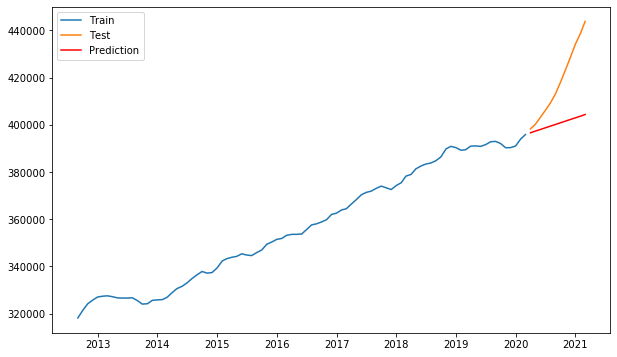

Model Explained Variance       r^2         MAE        RMSE  \
45           7662             29.66%  -109.57%  $17,581.86  $21,570.78   
44           7630             70.15%    40.96%   $8,972.58  $12,759.96   
43           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
42           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
41           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
40           7626             51.47%    28.85%   $8,756.52  $13,636.43   
39           7607             37.51%   -92.69%  $18,940.77  $23,042.41   
38           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
45   (2, 1, 0)   (0, 0, 0, 0)  1509.11  
44   (0, 2, 0)   (0, 0, 0, 0)  1547.41  
43   (0, 1, 0)   (0, 0, 0, 0)  1682.51  
42   (0, 1, 0)   (0, 0, 0, 0)  1567.08  
41   (0, 2, 0)   (0, 0, 0, 0)  1611.45  
40   (0, 1, 0)   (0, 0, 0, 0)  1682.01  
39   (2, 1, 2)   (0, 0, 0, 0)  1527.74  
38   (1, 1, 1)   (0, 0, 0, 0)  1629.08  
37   (0, 2, 0)   (0, 0, 0, 0)  1638.54  
36   (0, 1, 0)   (0, 0, 0, 0)  1512.10  
35   (0, 1, 0)   (0, 0, 0, 0)  1567.72  
34   (0, 1, 0)   (0, 0, 0, 0)  1532.57  


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1753.719, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1752.720, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1752.765, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1752.787, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1761.242, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1754.696, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.459 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -875.360
Date:                Thu, 27 May 2021   AIC                           1752.720
Time:                        15:26:54   BIC                           1755.209
Sample:                             0   HQIC                          1753.723
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.999e+07    3.1e+06      6.457      0.000    1.39e+07    2.61e+07
===================================================================================
Ljung-Box (Q):                      178.78   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.00   Prob(JB):                         0.92
Heteroskedasticity (H):               0.84   Skew:                             0.03
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

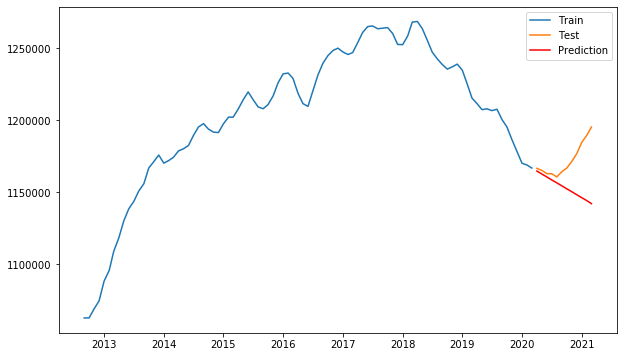

Model Explained Variance       r^2         MAE        RMSE  \
46           7632           -149.92%  -435.05%  $18,802.92  $25,757.38   
45           7662             29.66%  -109.57%  $17,581.86  $21,570.78   
44           7630             70.15%    40.96%   $8,972.58  $12,759.96   
43           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
42           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
41           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
40           7626             51.47%    28.85%   $8,756.52  $13,636.43   
39           7607             37.51%   -92.69%  $18,940.77  $23,042.41   
38           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
46   (0, 2, 0)   (0, 0, 0, 0)  1752.72  
45   (2, 1, 0)   (0, 0, 0, 0)  1509.11  
44   (0, 2, 0)   (0, 0, 0, 0)  1547.41  
43   (0, 1, 0)   (0, 0, 0, 0)  1682.51  
42   (0, 1, 0)   (0, 0, 0, 0)  1567.08  
41   (0, 2, 0)   (0, 0, 0, 0)  1611.45  
40   (0, 1, 0)   (0, 0, 0, 0)  1682.01  
39   (2, 1, 2)   (0, 0, 0, 0)  1527.74  
38   (1, 1, 1)   (0, 0, 0, 0)  1629.08  
37   (0, 2, 0)   (0, 0, 0, 0)  1638.54  
36   (0,

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1652.509, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1647.620, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1648.975, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1648.972, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1650.055, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1649.572, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.687 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -822.810
Date:                Thu, 27 May 2021   AIC                           1647.620
Time:                        15:26:55   BIC                           1650.108
Sample:                             0   HQIC                          1648.623
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.136e+06   1.01e+06      6.051      0.000    4.15e+06    8.12e+06
===================================================================================
Ljung-Box (Q):                      140.25   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.00   Prob(JB):                         0.69
Heteroskedasticity (H):               0.67   Skew:                             0.06
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

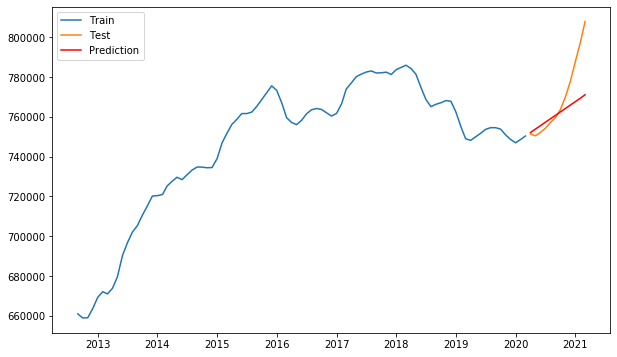

Model Explained Variance       r^2         MAE        RMSE  \
47           7627             50.04%    33.58%   $9,809.67  $15,220.73   
46           7632           -149.92%  -435.05%  $18,802.92  $25,757.38   
45           7662             29.66%  -109.57%  $17,581.86  $21,570.78   
44           7630             70.15%    40.96%   $8,972.58  $12,759.96   
43           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
42           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
41           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
40           7626             51.47%    28.85%   $8,756.52  $13,636.43   
39           7607             37.51%   -92.69%  $18,940.77  $23,042.41   
38           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
47   (0, 2, 0)   (0, 0, 0, 0)  1647.62  
46   (0, 2, 0)   (0, 0, 0, 0)  1752.72  
45   (2, 1, 0)   (0, 0, 0, 0)  1509.11  
44   (0, 2, 0)   (0, 0, 0, 0)  1547.41  
43   (0, 1, 0)   (0, 0, 0, 0)  1682.51  
42   (0, 1, 0)   (0, 0, 0, 0)  1567.08  
41   (0, 2, 0)   (0, 0, 0, 0)  1611.45  
40   (0, 1, 0)   (0, 0, 0, 0)  1682.01  
39   (2, 1, 2)  

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1595.172, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1588.663, Time=0.33 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1590.566, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1590.566, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1592.560, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1590.645, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.136 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -793.331
Date:                Thu, 27 May 2021   AIC                           1588.663
Time:                        15:26:57   BIC                           1591.151
Sample:                             0   HQIC                          1589.666
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.182e+06   4.63e+05      6.876      0.000    2.28e+06    4.09e+06
===================================================================================
Ljung-Box (Q):                       83.55   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.00   Prob(JB):                         0.99
Heteroskedasticity (H):               0.93   Skew:                             0.02
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

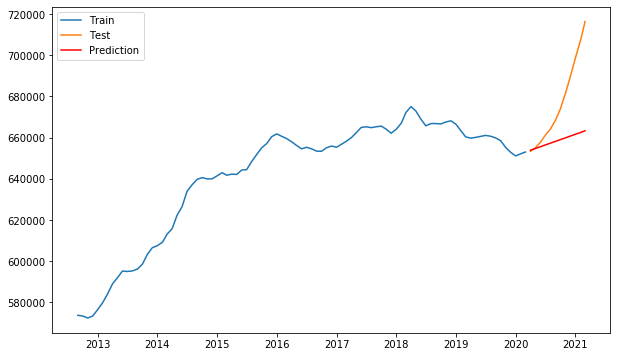

Model Explained Variance       r^2         MAE        RMSE  \
48           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
47           7627             50.04%    33.58%   $9,809.67  $15,220.73   
46           7632           -149.92%  -435.05%  $18,802.92  $25,757.38   
45           7662             29.66%  -109.57%  $17,581.86  $21,570.78   
44           7630             70.15%    40.96%   $8,972.58  $12,759.96   
43           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
42           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
41           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
40           7626             51.47%    28.85%   $8,756.52  $13,636.43   
39           7607             37.51%   -92.69%  $18,940.77  $23,042.41   
38           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
48   (0, 2, 0)   (0, 0, 0, 0)  1588.66  
47   (0, 2, 0)   (0, 0, 0, 0)  1647.62  
46   (0, 2, 0)   (0, 0, 0, 0)  1752.72  
45   (2, 1, 0)   (0, 0, 0, 0)  1509.11  
44   (0, 2, 0)   (0, 0, 0, 0)  1547.41  
43   (0, 1, 0)   (0, 0, 0, 0)  1682.51  
42   (0, 1, 0)   (0, 0, 

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1539.044, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1531.868, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1533.359, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1533.373, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1534.970, Time=0.36 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1533.865, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.575 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -764.934
Date:                Thu, 27 May 2021   AIC                           1531.868
Time:                        15:26:58   BIC                           1534.357
Sample:                             0   HQIC                          1532.871
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.709e+06   2.53e+05      6.747      0.000    1.21e+06    2.21e+06
===================================================================================
Ljung-Box (Q):                      139.43   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.00   Prob(JB):                         0.99
Heteroskedasticity (H):               1.21   Skew:                            -0.01
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

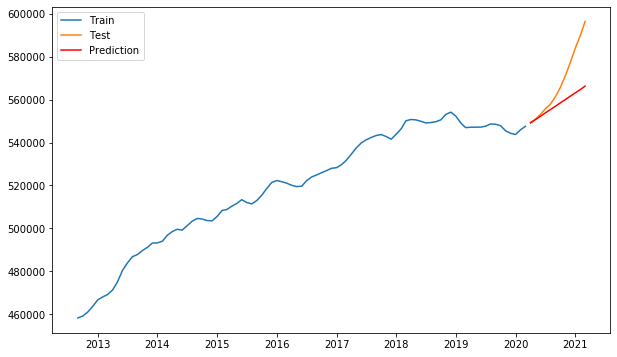

Model Explained Variance       r^2         MAE        RMSE  \
49           mean             56.34%    13.26%  $10,069.00  $14,286.58   
48           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
47           7627             50.04%    33.58%   $9,809.67  $15,220.73   
46           7632           -149.92%  -435.05%  $18,802.92  $25,757.38   
45           7662             29.66%  -109.57%  $17,581.86  $21,570.78   
44           7630             70.15%    40.96%   $8,972.58  $12,759.96   
43           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
42           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
41           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
40           7626             51.47%    28.85%   $8,756.52  $13,636.43   
39           7607             37.51%   -92.69%  $18,940.77  $23,042.41   
38           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
37           7670             52.22%    -4.85%  $13,237.08  $17,942.09   
36           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
35           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
34           7621             52.93%   -19.12%  $10,871.72  $13,978.81   
33           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
32           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
31           7601             42.16%   -90.65%  $14,894.93  $17,846.25   
30           mean             56.34%    13.26%  $10,069.00  $14,286.58   
29           7641             26.16%   -57.35%  $18,775.00  $25,665.00   
28           7627             51.06%    35.44%   $9,667.19  $15,005.42   
27           7632           -151.48%  -441.30%  $18,957.02  $25,907.51   
26           7662             35.86%   -87.36%  $16,540.30  $20,395.66   
25           7630             70.15%    40.96%   $8,972.58  $12,759.96   
24           7649             37.27%   -34.96%  $12,816.77  $17,520.03   
23           7603             26.86%  -112.61%  $22,793.82  $28,143.16   
22           7624             29.77%   -41.75%  $17,285.50  $24,277.02   
21           7626             51.47%    28.85%   $8,756.52  $13,636.43   
20           7607             31.13%  -110.90%  $19,783.56  $24,107.08   
19           7661              4.88%  -152.26%  $18,107.05  $22,941.78   
18           7670             51.84%    -5.98%  $13,323.83  $18,038.50   
17           7628             46.59%   -12.25%   $9,602.75  $13,263.53   
16           7646             41.06%   -59.07%  $12,155.19  $15,320.44   
15           7621             52.67%   -20.31%  $10,941.69  $14,048.40   
14           7631             44.74%   -87.56%  $14,883.62  $17,721.62   
13           7666             41.65%   -65.28%  $13,320.29  $16,560.52   
12           7601             43.69%   -83.65%  $14,585.04  $17,515.58   
11    Logged 36mo             72.40%   -27.89%  $17,652.63  $18,754.82   
10    Logged 24mo             51.31%    44.65%  $10,107.98  $11,462.20   
9     Logged 12mo             36.32%   -67.81%  $12,395.39  $15,735.58   
8   1st Diff 36mo             27.89%   -52.36%  $14,856.38  $20,470.48   
7   1st Diff 24mo             28.63%   -71.59%  $15,423.85  $20,182.22   
6   1st Diff 12mo             19.25%  -101.35%  $13,339.76  $17,236.65   
5   2nd Diff 36mo             60.01%    17.39%  $10,825.84  $15,072.79   
4   2nd Diff 24mo             51.12%    -9.21%  $11,966.97  $16,101.27   
3   2nd Diff 12mo             32.63%   -67.12%  $12,131.61  $15,703.24   
2            36mo             66.66%    38.33%   $8,827.77  $13,023.85   
1            24mo             54.17%     3.08%  $11,013.03  $15,168.44   
0            12mo             41.06%   -59.07%  $12,155.19  $15,320.44   

   ARIMA Order Seasonal Order      AIC  
49   (0, 2, 0)   (0, 0, 0, 0)  1531.87  
48   (0, 2, 0)   (0, 0, 0, 0)  1588.66  
47   (0, 2, 0)   (0, 0, 0, 0)  1647.62  
46   (0, 2, 0)   (0, 0, 0, 0)  1752.72  
45   (2, 1, 0)   (0, 0, 0, 0)  1

In [86]:
for column in df.columns:
    ts = df[column]
    train_12mo, test_12mo = model_selection.train_test_split(ts, test_size=12)
    arima = pm.auto_arima(train_12mo, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100)
    arima_eval(f"{column}", ts, train_12mo, test_12mo, arima);

# Build Base Function

## Model & Plot For One Zip

In [87]:
new_milford_7646_arima = pm.auto_arima(ts, error_action='ignore', trace=True,
                                       suppress_warnings=True, maxiter=100)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1887.315, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1828.769, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1956.810, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1835.780, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1870.392, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1884.193, Time=0.45 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.381 seconds


In [122]:
new_milford_7646_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  103
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -912.384
Date:                Thu, 27 May 2021   AIC                           1828.769
Time:                        17:28:51   BIC                           1834.019
Sample:                             0   HQIC                          1830.895
                                - 103                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1355.5654    193.286      7.013      0.000     976.732    1734.399
sigma2      3.444e+06   4.31e+05      7.990      0.000     2.6e+06    4.29e+06
===================================================================================
Ljung-Box (Q):                      205.61   Jarque-Bera (JB):                 7.06
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               3.55   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

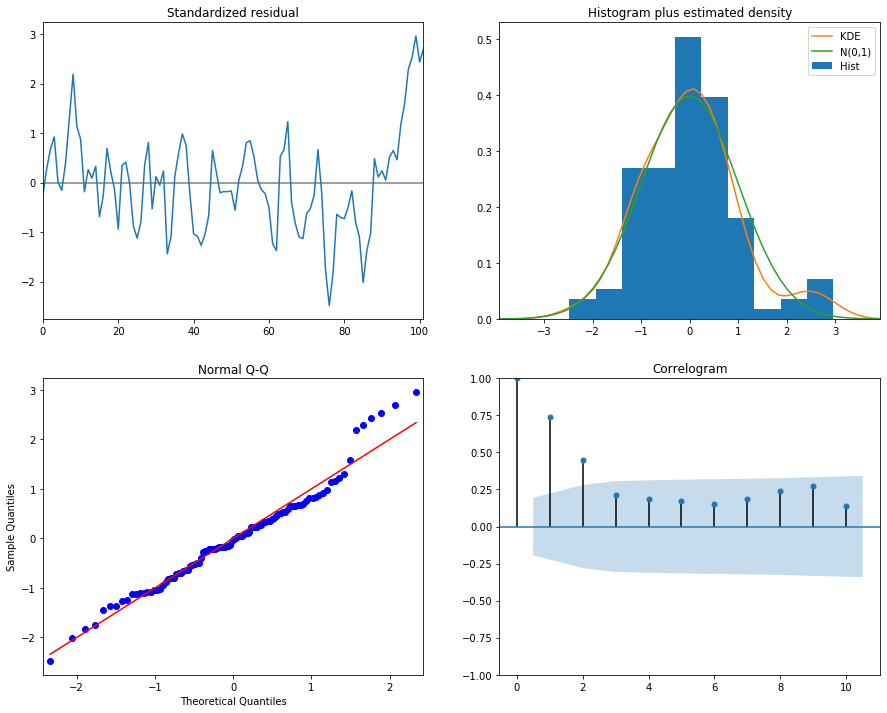

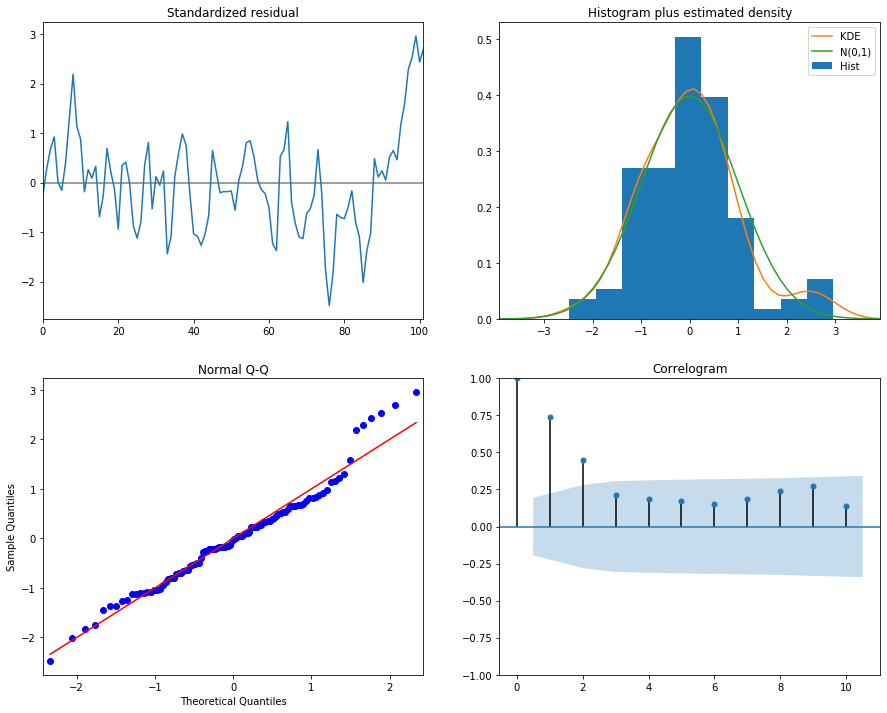

In [88]:
new_milford_7646_arima.plot_diagnostics(figsize=(15, 12))

In [107]:
pd.date_range(ts.index[-1], periods=7, freq="MS")[1:]

DatetimeIndex(['2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [104]:
dti = pd.date_range(ts.index[-1], periods=7, freq="MS")

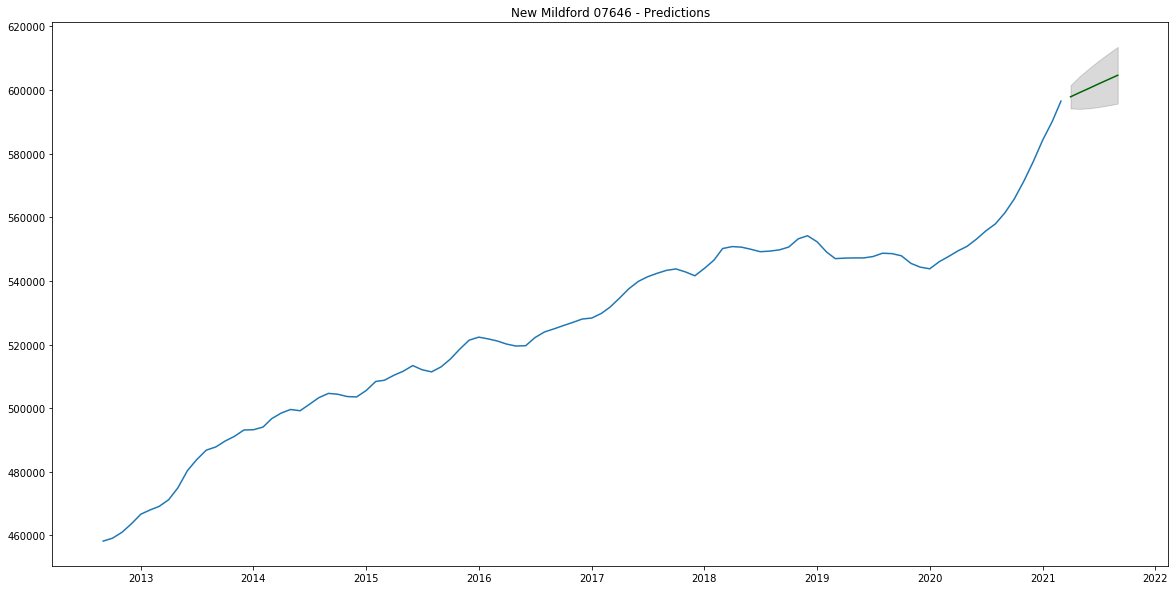

In [123]:
model = new_milford_7646_arima
dti = pd.date_range(ts.index[-1], periods=7, freq="MS")[1:]

# Forecast
n_periods = 6
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = dti

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(20,10))
plt.plot(ts)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("New Mildford 07646 - Predictions")
plt.show()

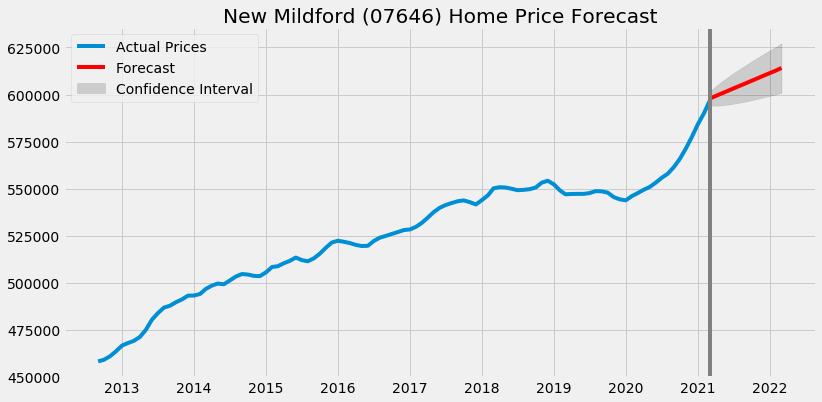

In [135]:
model = new_milford_7646_arima
dti = pd.date_range(ts.index[-1], periods=13, freq="MS")

# Forecast
n_periods = 13
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = dti

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.plot(ts, label="Actual Prices")
plt.plot(fc_series, color='red', label="Forecast")
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15, label="Confidence Interval")
plt.axvline(dti[0], color='gray') # show where forecast starts
plt.legend()
plt.title("New Milford (07646) Home Price Forecast")
plt.show()

In [178]:
confint[:,0][-1]

600998.4984778144

In [153]:
# calculate growth
growth = (fc[-1]-ts[-1])/ts[-1]*100
print(f"{growth:.2f}%")

2.95%


## Replicate For All Zips

In [197]:
id_cols = ['City', 'CountyName', 'State', 'RegionName']

In [198]:
df_id = df_full[id_cols].rename(columns = {'RegionName':'Zip'})

In [199]:
df_id

City        CountyName State    Zip
0              New York   New York County    NY  10025
1               Chicago       Cook County    IL  60657
2              New York   New York County    NY  10023
3                  Katy     Harris County    TX  77494
4               Chicago       Cook County    IL  60614
...                 ...               ...   ...    ...
30292     Central Point    Jackson County    OR  12345
30293         Texarkana      Bowie County    TX  75599
30294            Groton  Middlesex County    MA   1470
30295         Choudrant    Lincoln Parish    LA    822
30296  Charlotte Amalie       Kane County    UT    801

[30297 rows x 4 columns]

In [200]:
df_id = df_id[df_id.Zip.isin(selected_zipcodes)].reset_index(drop=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1632.322, Time=0.68 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1639.939, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1640.370, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1640.350, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1644.116, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1648.750, Time=0.12 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=1634.403, Time=0.79 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1647.036, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=1651.061, Time=0.22 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=1649.905, Time=0.14 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=1639.261, Time=0.53 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=1634.297, Time=0.39 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 3.909 seconds
The change in 7601 is predi

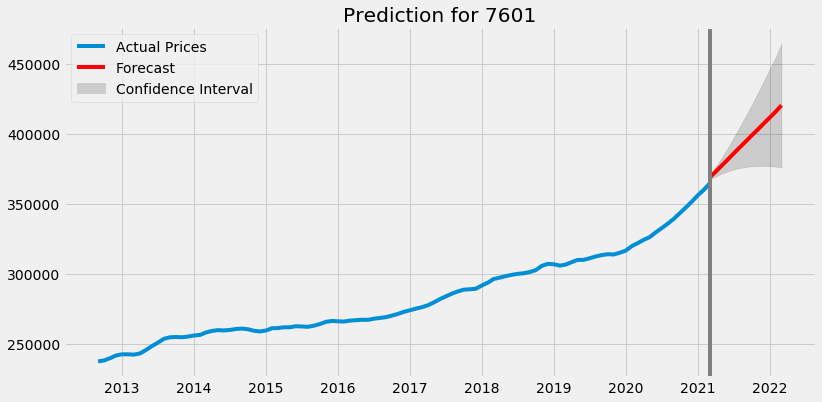

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1814.410, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1823.550, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1822.008, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1852.178, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1815.985, Time=0.52 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.724 seconds
The change in 7666 is predicted to be 3.29%


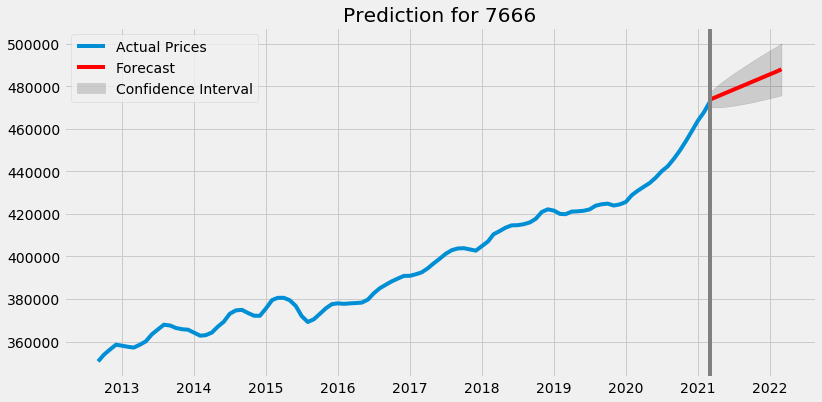

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1905.356, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1804.906, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1823.745, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1810.489, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1851.157, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1805.558, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.102 seconds
The change in 7631 is predicted to be 3.67%


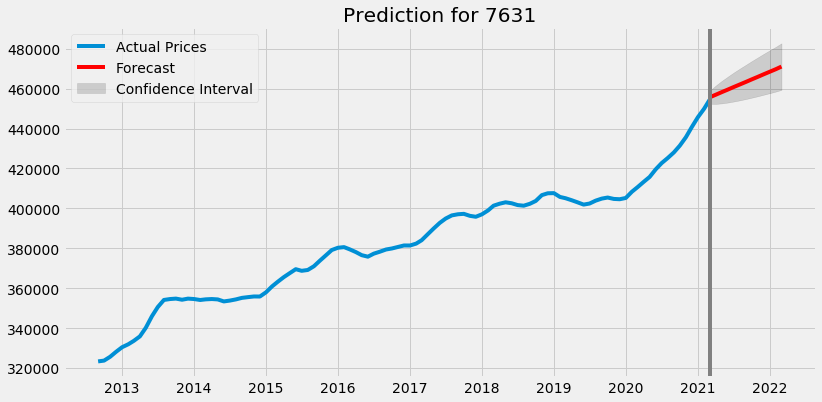

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1810.998, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1770.387, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1899.402, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1774.297, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1843.649, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1800.181, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.452 seconds
The change in 7621 is predicted to be 4.26%


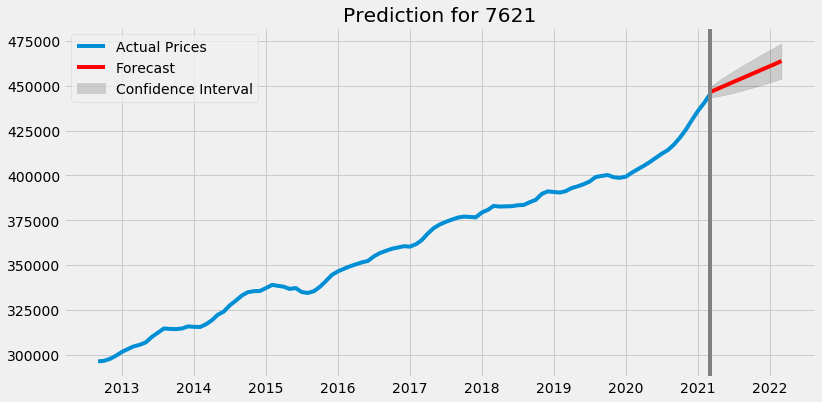

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1731.750, Time=0.63 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1737.810, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1739.761, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1739.809, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1743.473, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1747.398, Time=0.14 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=1750.101, Time=0.17 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=1751.468, Time=0.31 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1742.192, Time=0.02 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=1746.934, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=1748.229, Time=0.22 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=1720.649, Time=2.40 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=1755.727, Time=0.38 sec
 ARIMA(3,2,4)(0,0,0)[0]             : AIC=1755.865, Time=0.27 sec
 ARIMA(2,2,4)(0,0,0)[0]          

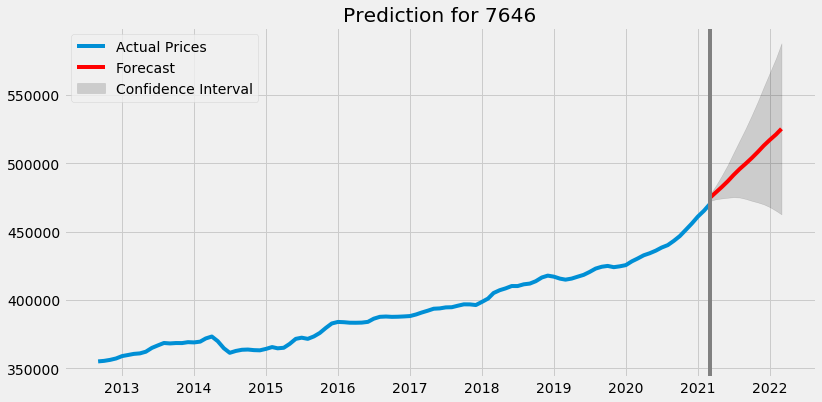

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1797.133, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1764.132, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1858.391, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1769.554, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1827.184, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1767.762, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.323 seconds
The change in 7628 is predicted to be 3.71%


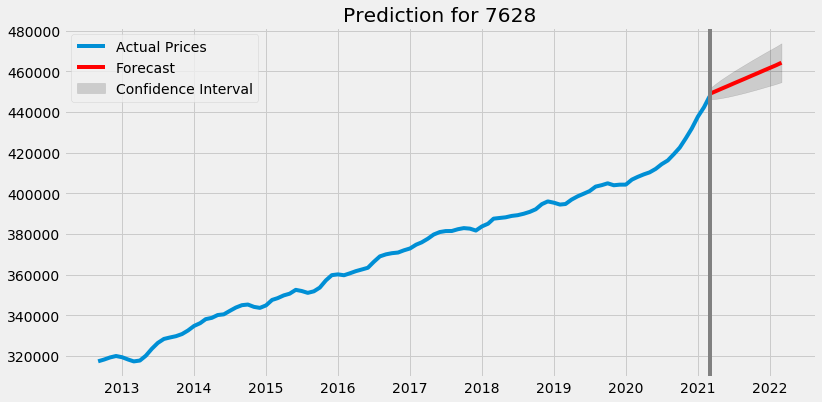

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1944.137, Time=1.57 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2018.122, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1954.271, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1961.193, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1990.330, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.019 seconds
The change in 7670 is predicted to be 2.27%


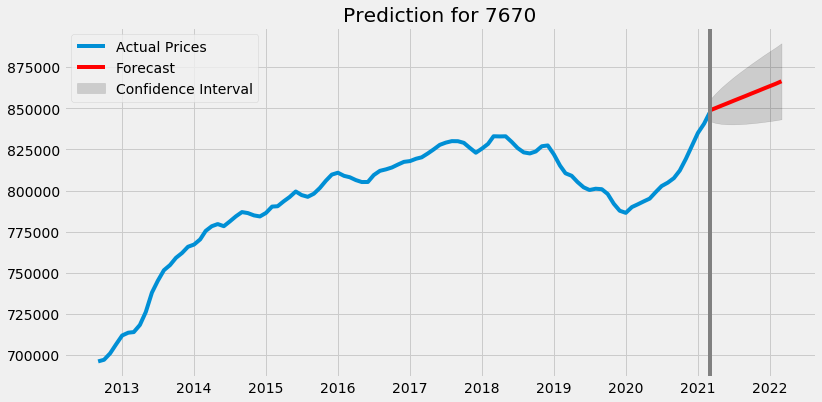

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1927.831, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1871.941, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1880.268, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1883.382, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1900.560, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1871.292, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1873.236, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1926.955, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1875.330, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1945.530, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.593 seconds
The change in 7661 is predicted to be 3.26%


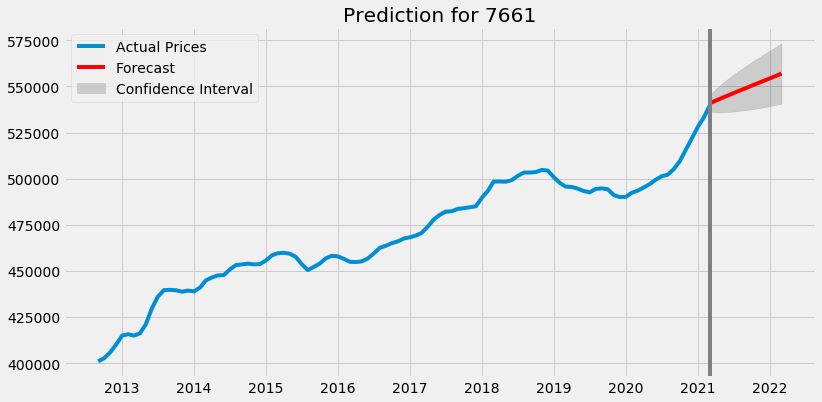

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1816.281, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1901.440, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1820.772, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1855.500, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1819.216, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.137 seconds
The change in 7607 is predicted to be 3.52%


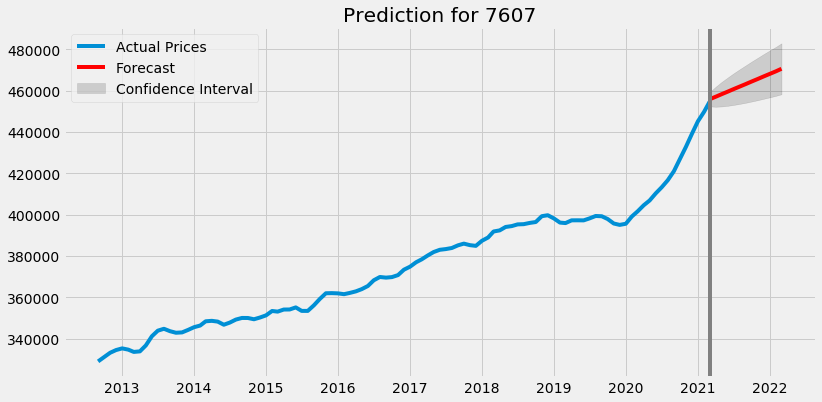

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1916.760, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1918.743, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1924.923, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1950.420, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1949.122, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.380 seconds
The change in 7626 is predicted to be 3.48%


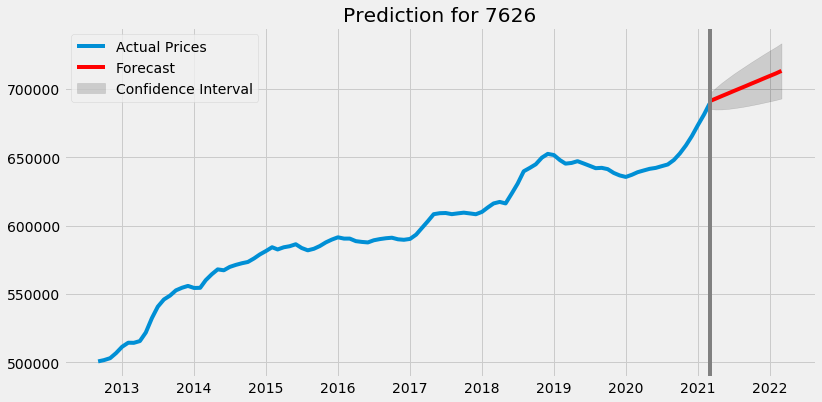

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1981.060, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1918.951, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2011.779, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1925.277, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1944.459, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1972.903, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.562 seconds
The change in 7624 is predicted to be 2.75%


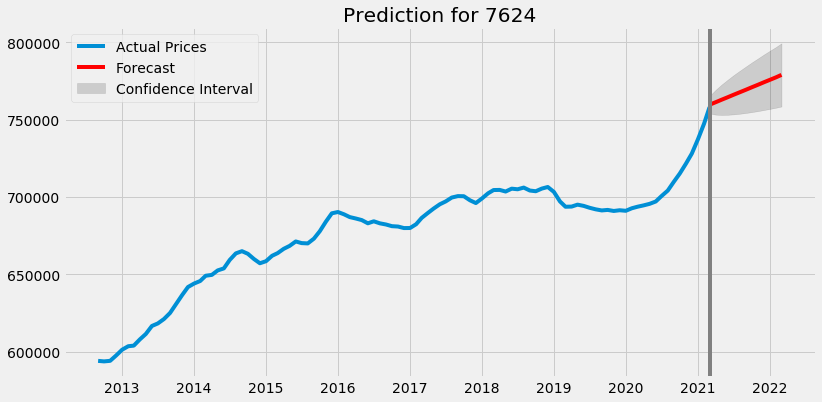

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1735.403, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1729.046, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1729.547, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1729.553, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1731.426, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1730.752, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.402 seconds
The change in 7603 is predicted to be 22.06%


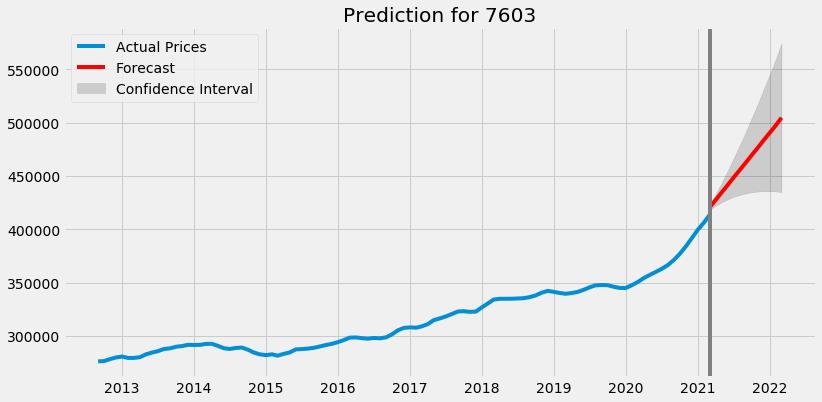

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1914.779, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1980.629, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1923.774, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1932.322, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1917.050, Time=0.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.189 seconds
The change in 7649 is predicted to be 2.56%


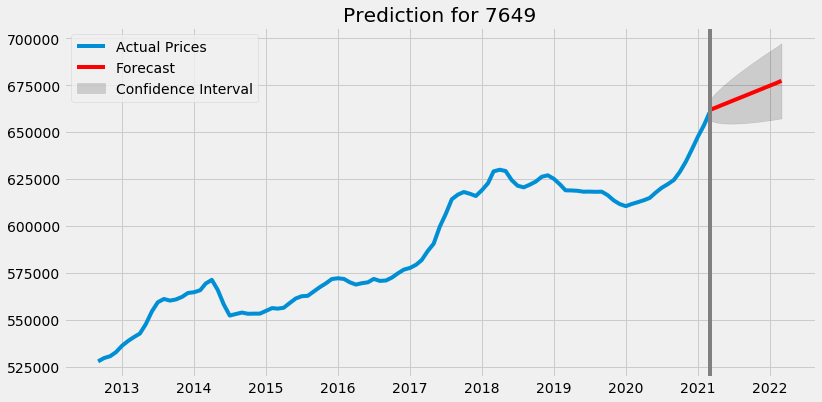

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1837.213, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1931.975, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1840.568, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1872.340, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1876.814, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.392 seconds
The change in 7630 is predicted to be 2.99%


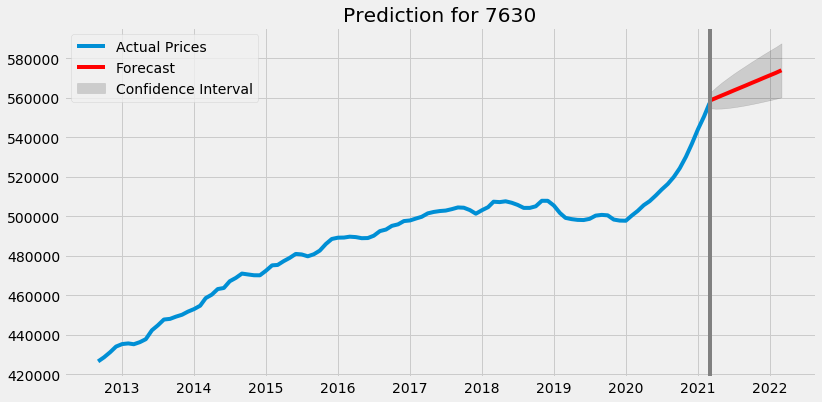

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1699.973, Time=0.97 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1693.954, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1695.920, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1696.019, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1697.020, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1695.918, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.510 seconds
The change in 7662 is predicted to be 14.75%


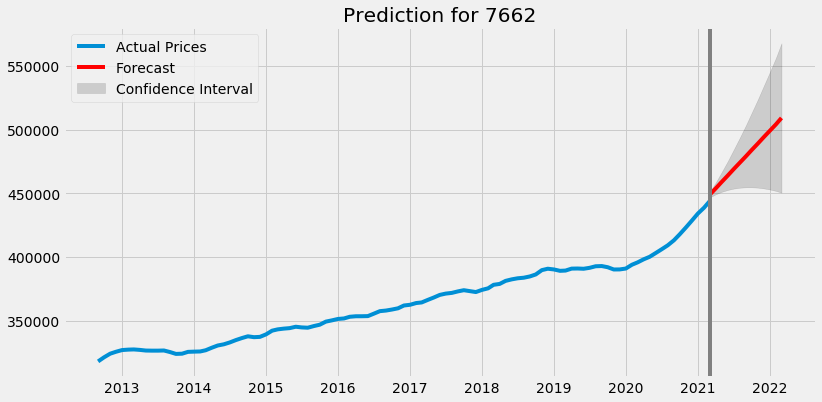

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1980.175, Time=0.44 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1979.837, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1979.679, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1979.709, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1981.636, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1988.541, Time=0.22 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1990.813, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1981.679, Time=0.04 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.112 seconds
The change in 7632 is predicted to be 6.16%


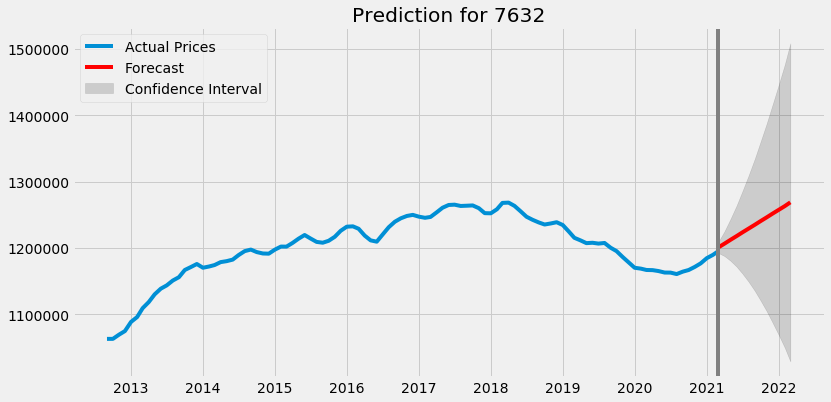

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2060.354, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1965.666, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2048.517, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1975.573, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1978.582, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2039.989, Time=0.65 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.706 seconds
The change in 7627 is predicted to be 2.32%


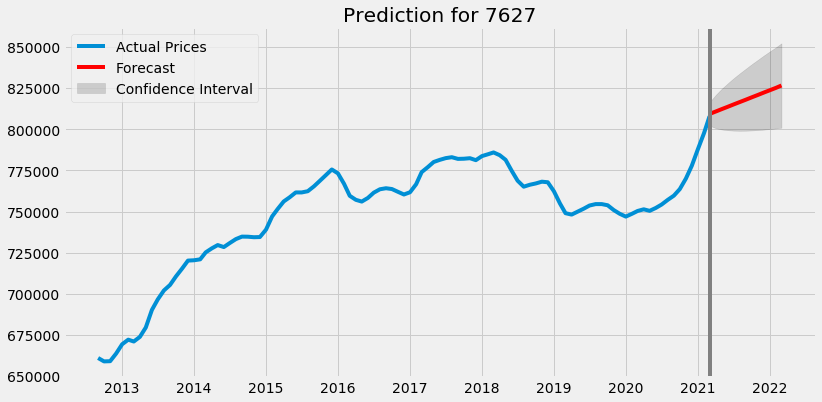

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1907.709, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2024.030, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1912.092, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1929.463, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 11.141 seconds
The change in 7641 is predicted to be 2.54%


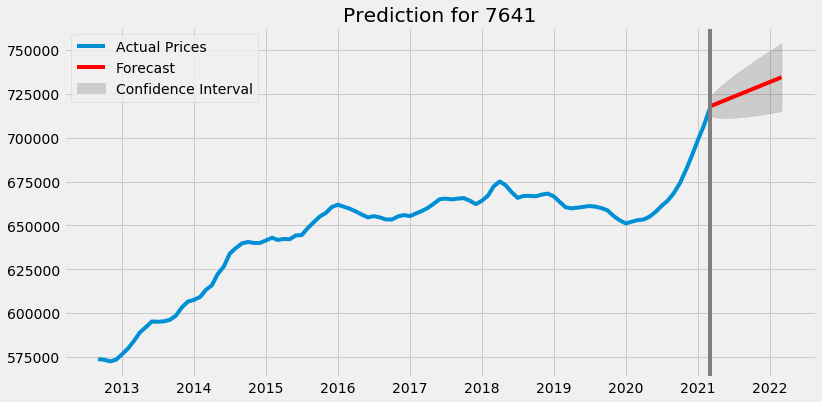

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1887.315, Time=3.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1828.769, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1956.810, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1835.780, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1870.392, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1884.193, Time=0.58 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.344 seconds
The change in mean is predicted to be 2.95%


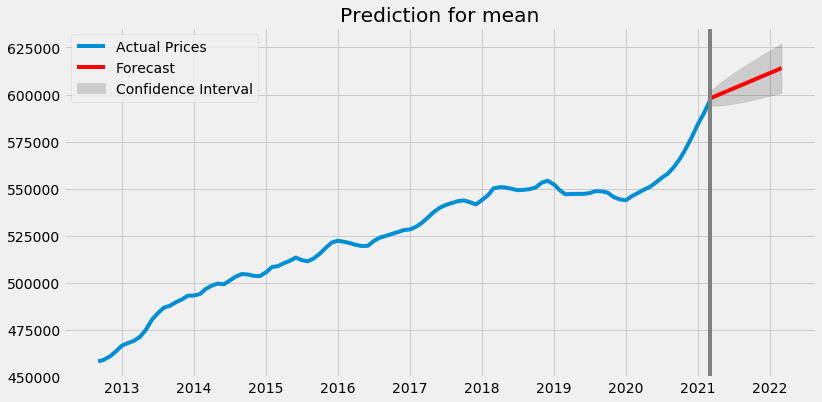

In [179]:
change = []

for column in df:
    # assign column as timeseries
    ts = df[column]
    
    # build model
    model = pm.auto_arima(ts, error_action='ignore', trace=True,
                          suppress_warnings=True, maxiter=100)
    
    dti = pd.date_range(ts.index[-1], periods=13, freq="MS")

    # Forecast
    n_periods = 13
    fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = dti

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Calculate Growth
    growth = (fc[-1]-ts[-1])/ts[-1]*100
    print(f"The change in {column} is predicted to be {growth:.2f}%")
    
    # Add to growth to list
    change.append(growth)

    # Plot
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(12,6))
    plt.plot(ts, label="Actual Prices")
    plt.plot(fc_series, color='red', label="Forecast")
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15, label="Confidence Interval")
    plt.axvline(dti[0], color='gray') # show where forecast starts
    plt.legend()
    plt.title(f"Prediction for {column}")
    plt.show()

In [195]:
mean_row = pd.DataFrame([['Mean', 'Mean', 'Mean', 'Mean']], columns=df_id.columns)

In [204]:
df_id = df_id.append(mean_row)

In [205]:
df_id['% Change'] = change

In [206]:
df_id

City     CountyName State   Zip   % Change
0         Hackensack  Bergen County    NJ  7601  15.340625
1            Teaneck  Bergen County    NJ  7666   3.285751
2          Englewood  Bergen County    NJ  7631   3.673347
3        Bergenfield  Bergen County    NJ  7621   4.255051
4        New Milford  Bergen County    NJ  7646  11.758563
5             Dumont  Bergen County    NJ  7628   3.708522
6            Tenafly  Bergen County    NJ  7670   2.271629
7         River Edge  Bergen County    NJ  7661   3.262029
8            Maywood  Bergen County    NJ  7607   3.521889
9          Cresskill  Bergen County    NJ  7626   3.484947
10           Closter  Bergen County    NJ  7624   2.754734
11            Bogota  Bergen County    NJ  7603  22.056390
12           Oradell  Bergen County    NJ  7649   2.558483
13           Emerson  Bergen County    NJ  7630   2.989266
14     Rochelle Park  Bergen County    NJ  7662  14.751125
15  Englewood Cliffs  Bergen County    NJ  7632   6.155114
16          Demarest  Bergen County    NJ  7627   2.317684
17           Haworth  Bergen County    NJ  7641   2.538769
0               Mean           Mean  Mean  Mean   2.954342

# Step 6: Interpreting Results